# Data Analytics
## Coursework 1 – Semester B, 2025

<br>

# "How accurately can machine learning models predict startup profitability based on funding, market share, and other business factors?"

<br>

[Used dataset: Startup Growth & Funding Trends](https://www.kaggle.com/datasets/samayashar/startup-growth-and-funding-trends)

<br>

---

<br>

# Data Management

## Load and Explore the Dataset

Import required libraries, load the CSV file, and check basic information

In [1]:
# Import required libraries

# Library to work with date and time
import datetime

# Data handling and manipulation
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif

# Model selection, splitting data and cross validation score
from sklearn.model_selection import train_test_split, cross_val_score

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Markdown display in Jupyter Notebooks
from IPython.display import display


In [2]:
# Load the dataset (CSV file)
df = pd.read_csv("startup_data.csv")

# Display the first 5 rows
df.head()

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired


In [3]:
# Check the dataset's information
df.info()

# Check if there are missing values
print("\nMissing values: \n", df.isnull().sum())

# Check if there are duplicated rows
print("\nDuplicated rows: ", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup Name            500 non-null    object 
 1   Industry                500 non-null    object 
 2   Funding Rounds          500 non-null    int64  
 3   Funding Amount (M USD)  500 non-null    float64
 4   Valuation (M USD)       500 non-null    float64
 5   Revenue (M USD)         500 non-null    float64
 6   Employees               500 non-null    int64  
 7   Market Share (%)        500 non-null    float64
 8   Profitable              500 non-null    int64  
 9   Year Founded            500 non-null    int64  
 10  Region                  500 non-null    object 
 11  Exit Status             500 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 47.0+ KB

Missing values: 
 Startup Name              0
Industry                  0
Funding Rounds 

<br>

There are no missing value and duplicated row in the dataset

<br>

## Exploratory Data Analysis

### Target Variable Distribution Analysis: Profitable

This is done to check if the dataset is imbalanced

- Since Profitable is the target variable, only need to check class distribution

<br>

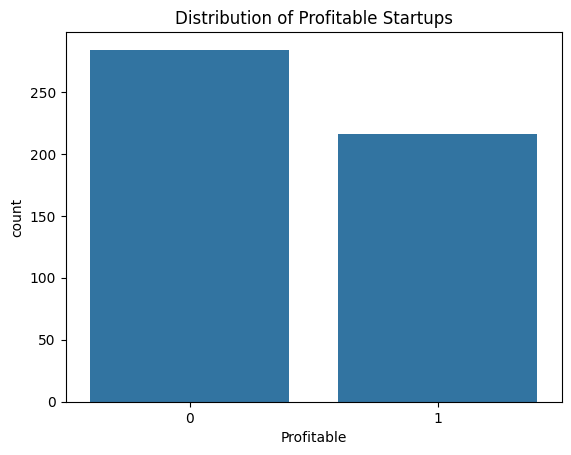

In [4]:
# Check if the dataset is balanced or imbalanced in terms of the Profitable column

sns.countplot(x = df["Profitable"])
plt.title("Distribution of Profitable Startups")
plt.show()

<br>

As shown above, the data is not extremely imbalanced, but more startups are unprofitable (0) than profitable (1)

<br>

### Feature Distribution Analysis: Discrete Feature

This is done to capture key growth and risk factors that drive startup profitability

- Features analysed include: Year Founded

<br>

Year Founded

A startup's founding year does not directly impact profitability, but its age does

- Older startups = more time to build profitability (but also risk of stagnation)

- Younger startups = higher risk, but potential for rapid growth

<br>

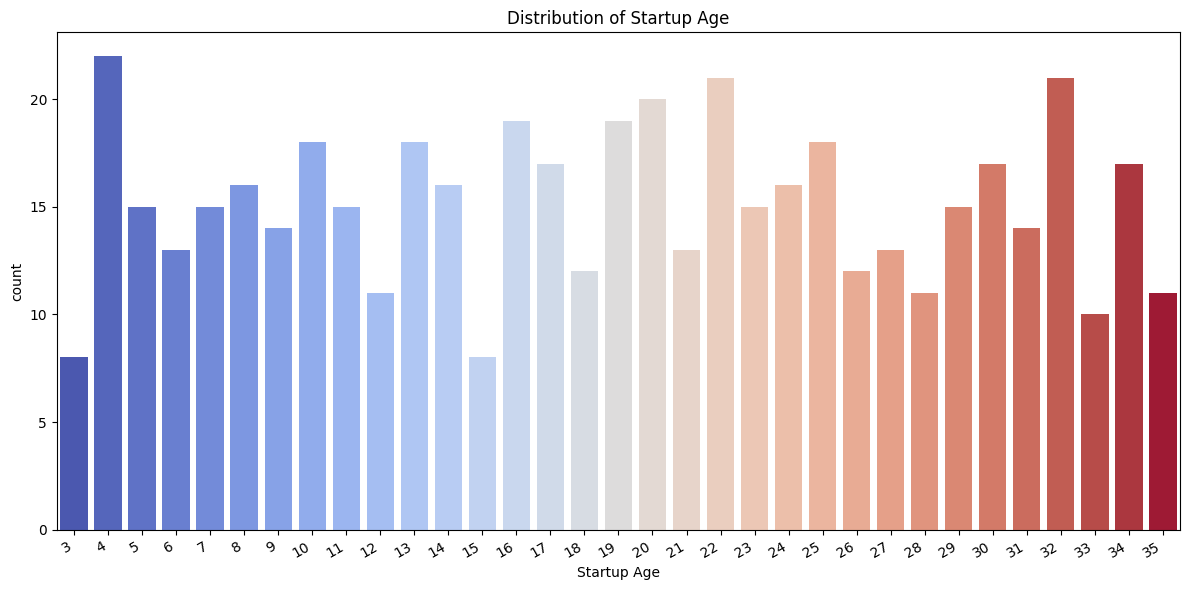

In [5]:
# Convert Startup Age
current_year = datetime.datetime.now().year
df["Startup Age"] = current_year - df["Year Founded"]

plt.figure(figsize = (12, 6))
sns.countplot(x=df["Startup Age"], hue=df["Startup Age"], palette="coolwarm", legend=False)
plt.xticks(rotation=30, ha="right")
plt.title("Distribution of Startup Age")

plt.tight_layout()
plt.show()

<br>

Startup Age distribution:

- The distribution is not uniform

- Some peaks at specific ages, suggesting:

    - More startups emerge in certain economic cycles

    - Older startups (25+ years) have survived longer

<br>


In [6]:
# Define function to check distribution characteristics

def check_distribution(df, columns):
    results = []
    for col in columns:
        mean = df[col].mean()
        median = df[col].median()
        std = df[col].std()
        spread_ratio = std / mean
        skewness = df[col].skew()

        ## Identify the spread based on spread ratio
        if spread_ratio > 1:
            spread = "Large"
        elif 0.5 < spread_ratio < 1:
            spread = "Moderate"
        else:
            spread = "Small"

        ## Identify the distribution type based on skewness
        if skewness > 1:
            distribution_type = "Highly Right-Skewed"
        elif skewness < -1:
            distribution_type = "Highly Left-Skewed"
        elif skewness > 0.5:
            distribution_type = "Moderately Right-Skewed"
        elif skewness < -0.5:
            distribution_type = "Moderately Left-Skewed"
        else:
            distribution_type = "Approximately Symmetrical"

        ## Add results to list
        results.append({
            "Feature": col,
            "Mean": round(mean, 4),
            "Median": round(median, 2),
            "Standard Deviation": round(std, 4),
            "Spread Ratio": round(spread_ratio, 4),
            "Spread": spread,
            "Skewness": round(skewness, 4),
            "Distribution Type": distribution_type
        })

    return results

# Run function and store results
startup_age_distribution_results = check_distribution(df, ["Startup Age"])

# Convert results to DataFrame and display
startup_age_distribution_df = pd.DataFrame(startup_age_distribution_results)

# Display in DataFrame
display(startup_age_distribution_df)


,Feature,Mean,Median,Standard Deviation,Spread Ratio,Spread,Skewness,Distribution Type
0,Startup Age,18.956,19.0,9.3471,0.4931,Small,0.0008,Approximately Symmetrical


<br>

Startup Age distribution:

- The distribution is well-balanced hence does not require a log transformation

<br>

### Feature Distribution Analysis: categorical features

This is done to identify data imbalances and avoid model bias, assess the significance of features to determine which ones to retain, and select the appropriate encoding to enhance model accuracy

- Features analysed include: Startup Name, Funding Rounds, Industry, Region, Exit Status

<br>

In [7]:
# Check unique values & distribution
categorical_cols = ["Startup Name", "Industry", "Region", "Exit Status"]

# Count unique values
for col in categorical_cols:
    print(f"\n{col} Distribution: \n{df[col].value_counts()}")


Startup Name Distribution: 
Startup Name
Startup_1      1
Startup_330    1
Startup_343    1
Startup_342    1
Startup_341    1
              ..
Startup_162    1
Startup_161    1
Startup_160    1
Startup_159    1
Startup_500    1
Name: count, Length: 500, dtype: int64

Industry Distribution: 
Industry
EdTech           74
FinTech          71
E-Commerce       70
Gaming           62
AI               62
IoT              61
Cybersecurity    51
HealthTech       49
Name: count, dtype: int64

Region Distribution: 
Region
Australia        108
Asia             103
Europe           102
North America     97
South America     90
Name: count, dtype: int64

Exit Status Distribution: 
Exit Status
Private     348
Acquired    107
IPO          45
Name: count, dtype: int64


<br>

Startup Name

- Startup Name is non-numeric and is unique for each row (functions as ID), thus can be dropped

<br>

In [8]:
# Count the number of unique startup names in the data set, and print it
print(f"{len(df["Startup Name"].unique())}")

# Drop the "Startup Name" column from the dataset
df.drop(columns = ["Startup Name"], inplace = True)

500


<br>

Funding Rounds, Industry, Region and Exit Status

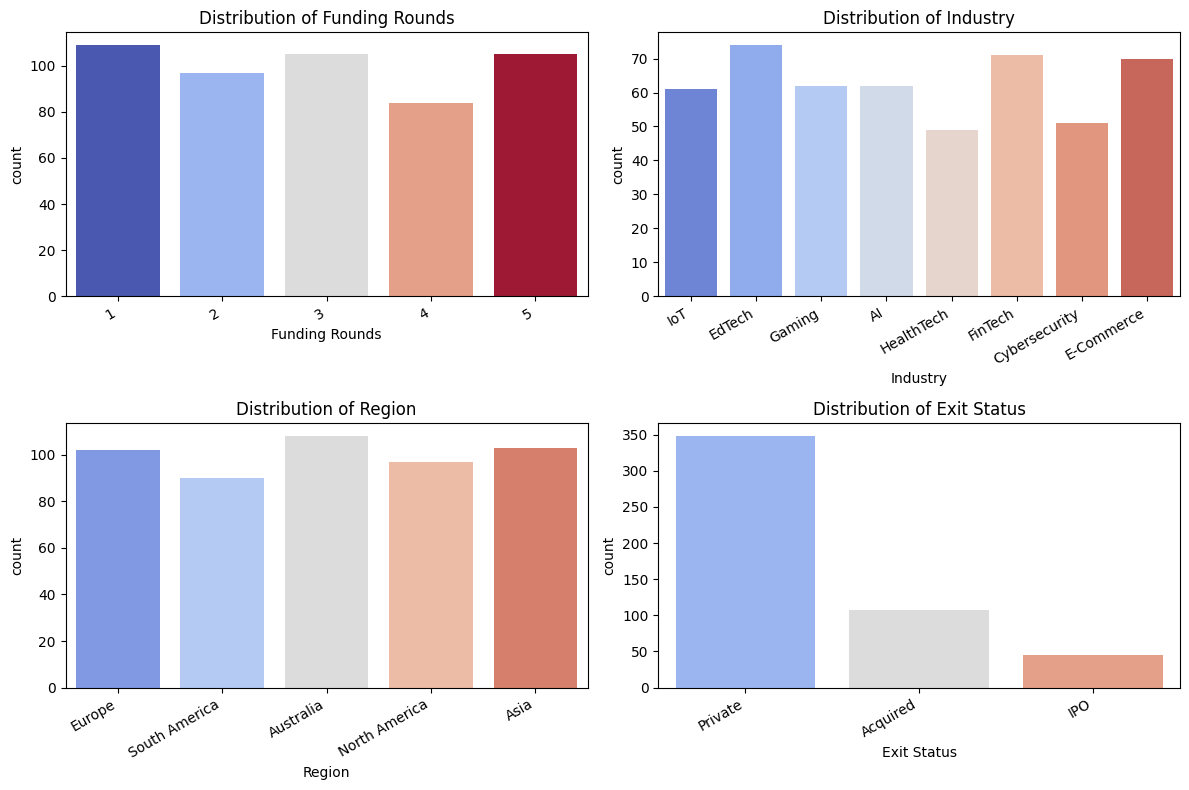

In [9]:
# Define categorical columns
categorical_cols = ["Funding Rounds", "Industry", "Region", "Exit Status"]

# Set the figure size for better visualisation
plt.figure(figsize=(12, 8))  

# Loop through categorical columns to plot their distributions
for i, col in enumerate(categorical_cols, 1):

    # Create a subplot (2 rows, 2 columns, position i)
    plt.subplot(2, 2, i)
    
    # Plot count distribution
    sns.countplot(x=df[col], hue=df[col], palette="coolwarm", legend=False)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=30, ha="right")  
    
    # Set the title for each subplot
    plt.title(f"Distribution of {col}")

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Display the plots
plt.show()


<br>

Funding Rounds:

- It is a discrete feature with values from 1 to 5
    
    - Since the values are not continuous, they will be treated as a categorical numerical feature in modelling

    - Each funding round (1 to 5) has a similar number of startups, suggesting no extreme imbalance in funding stages

        - Funding round 1 has the highest count, indicating the most startups are still at their early-stage funding phase

        - Funding round 2 and 3 also have high counts, suggesting that many startups reach mid-stage funding, but fewer reach later rounds

        - Funding round 4 has slightly fewer startups compared to others

        - Funding round 5 increases again, which could mean that only the most successful startups survive and secure late-stage investment

<br>

Distribution of Industry:

- EdTech, FinTech and E-Commerce startups are most frequent, suggesting these sectors receive significant startup activity

- HealthTech and Cybersecurity have relatively fewer startups, which indicates lower startup presence

- The distribution appears somewhat balanced, though there are some underrepresented industries (e.g., HealthTech)

    - Underrepresented industries may lead to weak model generalisation

        - Consider merging or balancing industry classes

<br>

Distribution of Region:

- Australia has the highest representation, followed by Europe and Asia

    - Model might overfit to Australian start up conditions

- South America has the lowest number of startups

<br>

Distribution of Exit Status

- Heavily skewed distribution
    - Private startups dominate (majority remain private)

    - Acquired startups are significantly fewer

    - IPO startups are the least common

- The model might struggle to predict IPOs accurately since there are too few examples

- It may overfit to private companies, predicting "Private" more often than "Acquired" or "IPO"

    - Consider oversampling IPO & Acquired startups

<br>


### Feature Distribution Analysis: continuous numeric features

This is done to identify skewness & spread and determine if transformation is needed
- Features analysed include: Funding Amount (M USD), Valuation (M USD), Revenue (M USD), Employees, and Market Share (%)

    - These continuous numeric features were selected as they are the continuous features that need transformation decisions (such as log transformation, standardisation)

<br>

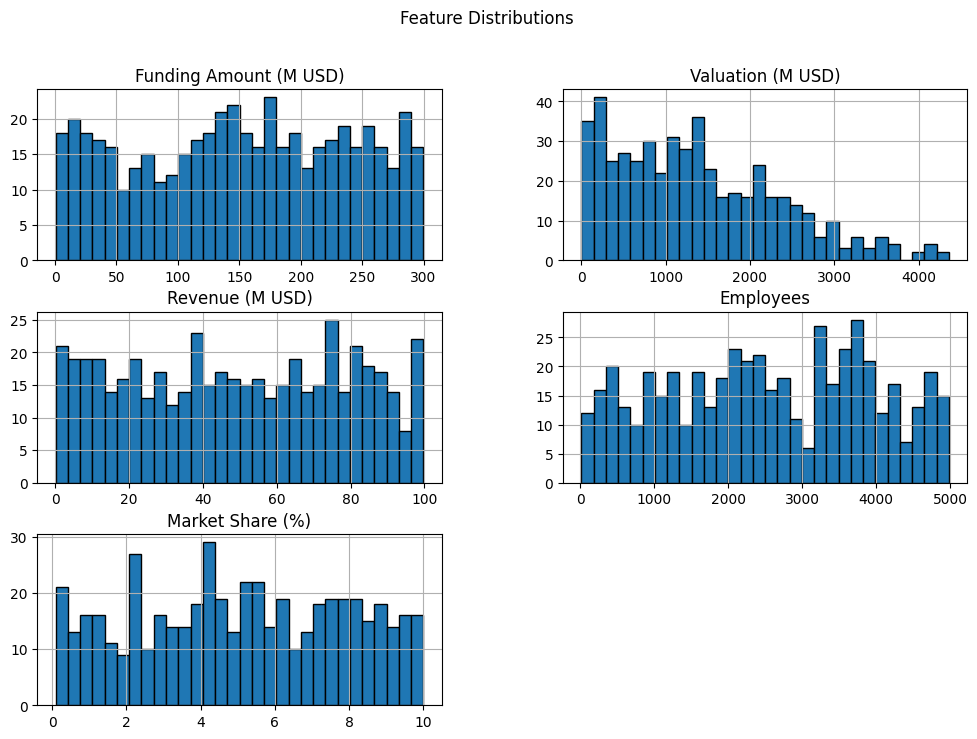

In [10]:
# Visualise feature distributions
numerical_cols = ["Funding Amount (M USD)", "Valuation (M USD)", \
                  "Revenue (M USD)", "Employees", "Market Share (%)"]

# Create histograms
df[numerical_cols].hist(figsize = (12, 8), bins = 30, edgecolor = "black")

# Set a super title to the entire figure
plt.suptitle("Feature Distributions")

# Display plots
plt.show()

In [11]:
# List of numerical columns to analyse
cols_to_check = ["Funding Amount (M USD)", "Valuation (M USD)", "Revenue (M USD)", "Employees", "Market Share (%)"]

# Run the function and store results
distribution_results = check_distribution(df, cols_to_check)

# Convert results to DataFrame and display
distribution_df = pd.DataFrame(distribution_results)

# Display the distribution dataframe
display(distribution_df)

,Feature,Mean,Median,Standard Deviation,Spread Ratio,Spread,Skewness,Distribution Type
0,Funding Amount (M USD),152.6568,156.00,86.6837,0.5678,Moderate,-0.0898,Approximately Symmetrical
1,Valuation (M USD),1371.8092,1222.58,978.2266,0.7131,Moderate,0.6927,Moderately Right-Skewed
2,Revenue (M USD),49.3217,48.80,29.2676,0.5934,Moderate,-0.0107,Approximately Symmetrical
3,Employees,2532.0920,2496.50,1385.4349,0.5472,Moderate,-0.0492,Approximately Symmetrical
4,Market Share (%),5.0929,5.13,2.8076,0.5513,Moderate,-0.0404,Approximately Symmetrical


<br>



1. Funding Amount (M USD) has a moderate spread (std ≈ 57% of mean), so standardisation is needed
    - Standardisation will ensure that the values are on a comparable scale with other features

2. Valuation (M USD) is moderately right-skewed (skewness = 0.69), meaning it requires log transformation and standardisation 
    - The log transformation will reduce the effect of extreme values
    - Standardisation will ensure the scale is consistent across features

3. Revenue (M USD) has a moderate spread (std ≈ 59% of mean), so standardisation is needed
    - Standardisation will help the model handle values more efficiently by normalising the range

4. Employees has a moderate spread (std ≈ 55% of mean), so standardisation is needed
    - Since the values vary widely, scaling prevents larger numbers from dominating model learning

5. Market Share (%) is already bounded between 0% and 10%

    - The values are naturally scaled as percentages, however, to ensure it is on the same scale as other features, standardisation will be applied

<br>

### Outliers Detection & Handling

This is done to identify extreme values that might distort machine learning models.

- Feature analysed include: Startup Age

    - Startup Age is numerical, meaning extremely high or low values may be outliers

<br>

- Other features analysed include: Funding Amount (M USD), Valuation (M USD), Revenue (M USD), Employees, and Market Share (%)

    - These numeric features were selected as they can have extreme outliers that impact model learning

    - Categorical features including Funding Rounds, Industry, Region, Exit Status, Profitable were excluded as outliers do not exist in categorical variables

<br>


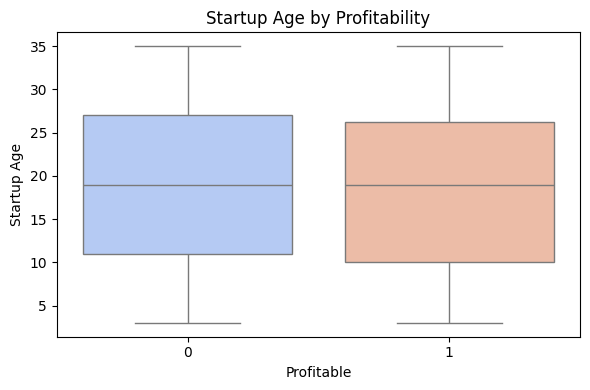

In [12]:
# Set the overall size of the plot
plt.figure(figsize = (6, 4))

# Create a boxplot using seaborn
sns.boxplot(x=df["Profitable"], y=df["Startup Age"], hue=df["Profitable"], palette="coolwarm", legend=False)

# Add a title to the plot
plt.title("Startup Age by Profitability")

# Adjust the layout so that the plot elements fit within the figure without overlapping
plt.tight_layout()

# Display the boxplot
plt.show()

<br>

1. Startup Age shows no extreme outliers

    - There is no individual points beyond the whiskers

<br>

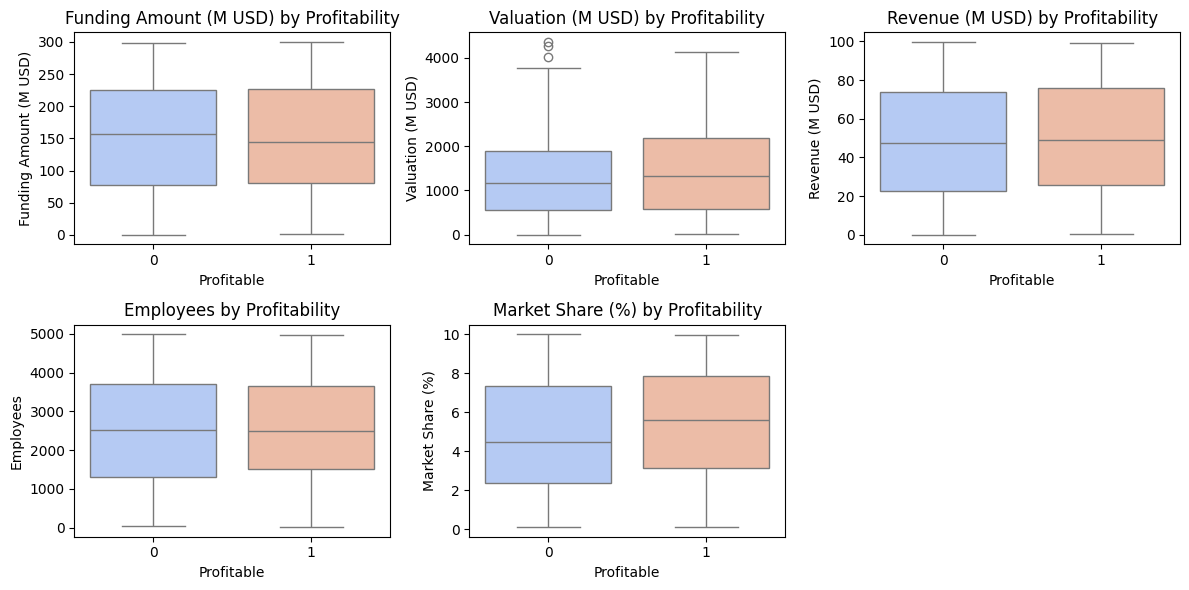

In [13]:
# Set the overall size of the plot
plt.figure(figsize=(12, 6))

# Iterate over a list of numerical columns related to financial metrics
for i, col in enumerate(["Funding Amount (M USD)", "Valuation (M USD)", "Revenue (M USD)", "Employees", "Market Share (%)"]):
    
    # Create a subplot
    plt.subplot(2, 3, i+1)

    # Create a boxplot using seaborn
    sns.boxplot(x=df["Profitable"], y=df[col], hue=df["Profitable"], palette="coolwarm", legend=False)
    
    # Set a title for each plot
    plt.title(f"{col} by Profitability")

# Adjust the layout so that the plot elements fit within the figure without overlapping
plt.tight_layout()

# Display the boxplot
plt.show()


<br>


1. Funding Amount (M USD) shows no extreme outliers

    - There is no individual points beyond the whiskers

2. Valuation (M USD) has a few outliers above 4000M USD, which are beyond the upper whisker

    - Most values are within a reasonable range, but extreme ones can impact model learning

        - Since removing outliers can result in data loss, applying a log transformation instead

            - This will preserve all data points, reduce the effect of extreme values and make distribution more normal, which will result in improving model performance

3. Revenue (M USD) shows no extreme outliers

    - There is no individual points beyond the whiskers

4. Employees shows no extreme outliers

    - There is no individual points beyond the whiskers

5. Market Share (%) shows no extreme outliers

    - There is no individual points beyond the whiskers

<br>

### Conclusion of Feature Distribution Analysis and Outlier Detection & Handling




| **Feature**           | **Outliers** | **Action**                 | **Reason**                                      |
|----------------------|----------------|--------------------------------|------------------------------------------------|
| **Startup Age**   | No          | Standardisation             | No extreme values, well-distributed               |
| **Funding Amount**   | No          | Standardisation              | No extreme values, moderate spread               |
| **Valuation**        | Yes         | Log Transform | Right-skewed, extreme values present          |
| **Revenue**          | No          | Standardisation              | Well-distributed, but needs scaling for ML    |
| **Employees**        | No          | Standardisation              | Large numeric range, requires scaling         |
| **Market Share (%)** | No          | No action needed             | Already in 0-10% range           |

<br>

<br>

### Bivariate Analysis: categorical feature

Bivariate Analysis on categorical feature vs. profitability

Profitable,0,1
Funding Rounds,,
1,0.587156,0.412844
2,0.525773,0.474227
3,0.600000,0.400000
4,0.678571,0.321429
5,0.466667,0.533333


Profitable,0,1
Industry,,
AI,0.532258,0.467742
Cybersecurity,0.686275,0.313725
E-Commerce,0.457143,0.542857
EdTech,0.540541,0.459459
FinTech,0.661972,0.338028
Gaming,0.661290,0.338710
HealthTech,0.551020,0.448980
IoT,0.475410,0.524590


Profitable,0,1
Region,,
Asia,0.524272,0.475728
Australia,0.518519,0.481481
Europe,0.539216,0.460784
North America,0.618557,0.381443
South America,0.655556,0.344444


Profitable,0,1
Exit Status,,
Acquired,0.551402,0.448598
IPO,0.466667,0.533333
Private,0.586207,0.413793


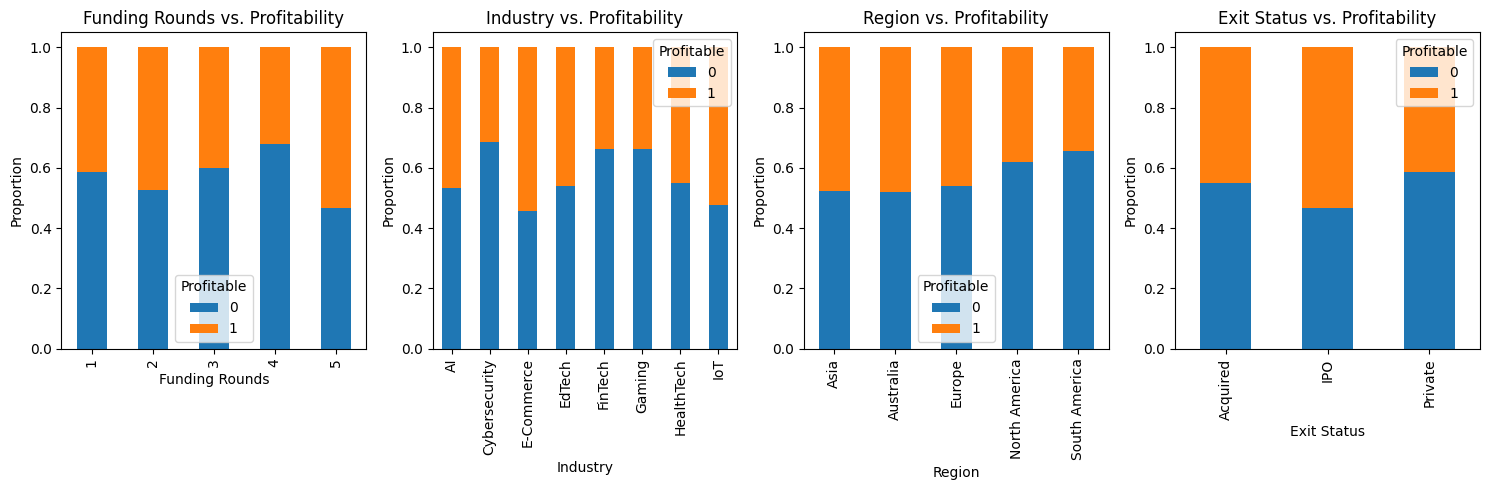

In [14]:
# List of categorical features to analyse
categorical_cols = ["Funding Rounds", "Industry", "Region", "Exit Status"]
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_cols), figsize=(15, 5))

# Loop through each categorical feature and perform crosstab nomarlisation & plotting
for i, feature in enumerate(categorical_cols):
    
    # Compute crosstab
    crosstab = pd.crosstab(df[feature], df["Profitable"])

    # Normalise by row sum
    crosstab_normalised = crosstab.div(crosstab.sum(1).astype(float), axis = 0)

    # Display the results
    display(crosstab_normalised)

    # Plot the stacked bar chart
    crosstab_normalised.plot(kind="bar", stacked=True, ax=axes[i])

    # Set a title for each plot
    axes[i].set_title(f"{feature} vs. Profitability")

    # Set a y-axis label for each plot
    axes[i].set_ylabel("Proportion")

# Prevent plots from overlapping
plt.tight_layout()

# Show the plots
plt.show()



<br>

Funding Rounds

- Profitability starts high in round 2, decreases in rounds 3 and 4, then increases in round 5

    - This suggests that simply raising more funding rounds does not always guarantee higher profitability, but startups that reach later, round 5, are more likely to succeed

- Startups in early rounds, round 1 and 2, have a mixed success rate

    - Funding round 1 has a fairly low profitability rate, showing that many early-stage startups struggle to become profitable

    - Funding round 2 has a noticeably higher proportion of profitable startups, meaning that some startups reach sustainability early

    - Startups securing second-round funding have a better profitability chance

- Mid-stage funding (rounds 3 and 4) se a profitability decline

    - Funding round 3 has lower profitability than round 2, but slightly better than round 4

    - Funding round 4 has the lowest proportion of profitable startups

    - This indicates that many startups in round 3 and round 4 face financial struggles despite securing additional funding

- Funding round 5 has the highest profitability rate

    - Startups that reach round 5 are most likely to be profitable 

        - This suggest that only the strongest, most financially sustainable startups survive to round 5 and achieve profitability

<br>

Industry

- More profitable industries:

    - E-Commerce (54.29% profitable) and IoT (52.46% profitable) have the highest proportions of profitable startups

    - These industries might have lower operational costs, strong demand, or quicker monetisation strategies

- Less profitable industries:

    - Cybersecurity (31.37% profitable), FinTech (33.80% profitable), and Gaming (33.87% profitable) have the lowest profitability rates

    - These industries likely have high R&D costs, longer customer acquisition times, or intense competition

- AI, EdTech, and HealthTech show nearly balanced profitability ratios (45-47% profitable)

<br>

Region

- Higher profitability regions:

    - Australia (48.15% profitable) and Asia (47.57% profitable) have the highest proportion of profitable startups

- Lower profitability regions:

    - North America (38.14% profitable) and South America (34.44% profitable) have more struggling startups

    - This could be due to higher operational costs, market saturation, or economic conditions

- Europe falls in the middle, with 46.08% profitability, suggesting a more balanced startup ecosystem

<br>

Exit Status

- More profitable exit type:

    - IPO startups are the most profitable (53.33%), indicating that startups that reach IPO status have strong business models and financial health

- Acquired startups show a balanced trend (44.86% profitable)

    - This means not all acquisitions happen for strong financial reasons – some might be struggling startups acquired for strategic purposes

- Private startups have the lowest profitability (41.38%)

    - This indicates that many private startups are still growing and may not have reached profitability yet

<br>

### Bivariate Analysis: continuous feature vs. profitability

Bivariate Analysis on continuous feature vs. profitability

This is done to examine how features interact with each other, particularly with the target variable (Profitable)

- Feature pairs analysed include:

    - Startup Age vs. Profitable
        - Are older startups more profitable?

    - Funding Amount (M USD) vs. Profitable
        - Does higher funding lead to profitability?

    - Valuation (M USD) vs. Profitable
        - Are highly valued startups more profitable?

    - Revenue (M USD) vs. Profitable
        - Is revenue a strong predictor of profitability?

    - Employees vs. Profitable
        - Does a larger workforce impact profitability?

    - Market Share (%) vs. Profitable
        - Does higher market share make startups more successful?

<br>

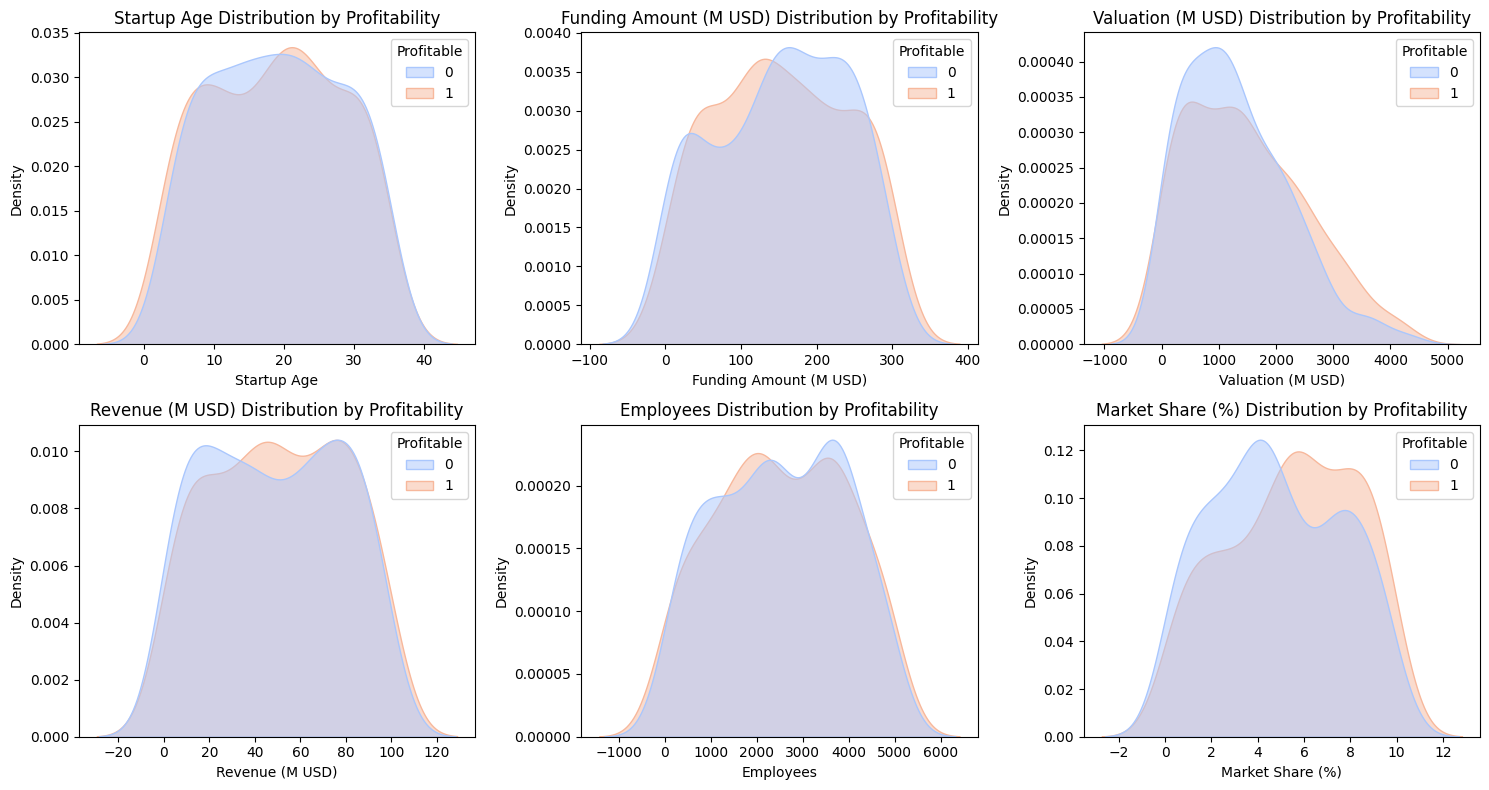

In [15]:
# List of numerical features to compare with Profitable
numerical_features = ["Startup Age", "Funding Amount (M USD)", "Valuation (M USD)", "Revenue (M USD)", "Employees", "Market Share (%)"]

# Set the figure size
plt.figure(figsize=(15, 8))

# Loop through features and create boxplots
for i, col in enumerate(numerical_features, 1):
    
    # Create a subplot
    plt.subplot(2, 3, i)

    # Create KDE plot using seaborn
    sns.kdeplot(data=df, x=col, hue="Profitable", common_norm=False, fill=True, palette="coolwarm", alpha=0.5)
    
    # Set a title for each plot
    plt.title(f"{col} Distribution by Profitability")

# Prevent plots from overlapping
plt.tight_layout()

# Display the plots
plt.show()

<br>

| **Feature**               | **Observations** |
|---------------------------|-----------------|
| **Startup Age**           | The distributions are very similar, profitable startups appear to be more concentrated between 5-20 years, very young startups (0-5 years), profitability does not necessarily increase with age beyond a certain point |
| **Funding Amount**        | Profitable startups have a higher density in the mid-range ($50M-$250M), some highly funded startups ($300M+) still struggle to be profitable, suggesting inefficient capital allocation |
| **Valuation**             | Profitable startups have higher densities in the $500M-$1500M valuation range, unprofitable ones are scattered across different valuation levels, valuation alone is not a guarantee of profitability |
| **Revenue**               | Revenue is one of the strongest indicators of profitability, profitable startups show significantly higher densities in the $40M-$60M range, unprofitable startups have higher density in revenue at $10M and $80M, respectively  |
| **Employees**             | The number of employees alone is not a strong predictor of profitability, larger workforces (>5000 employees) do not necessarily lead to higher profitability |
| **Market Share (%)**      | Market share is a strong differentiator of profitability, startups with market share below 5% are more likely to be unprofitable, high market share (7-10%) strongly correlates with profitability |

<br>

Final Takeaways:

1. Revenue and Market Share are the strongest indicators of profitability

2. Funding Amount and Valuation alone do not guarantee profitability – how funding is utilised matters

3. Startup age plays a role – most profitable startups are between 5-20 years old

4. Funding Rounds impact profitability – startups with 2 or 5 funding rounds tend to perform better

5. Large employee counts (>5000) do not necessarily mean profitability – operational efficiency is key

<br>


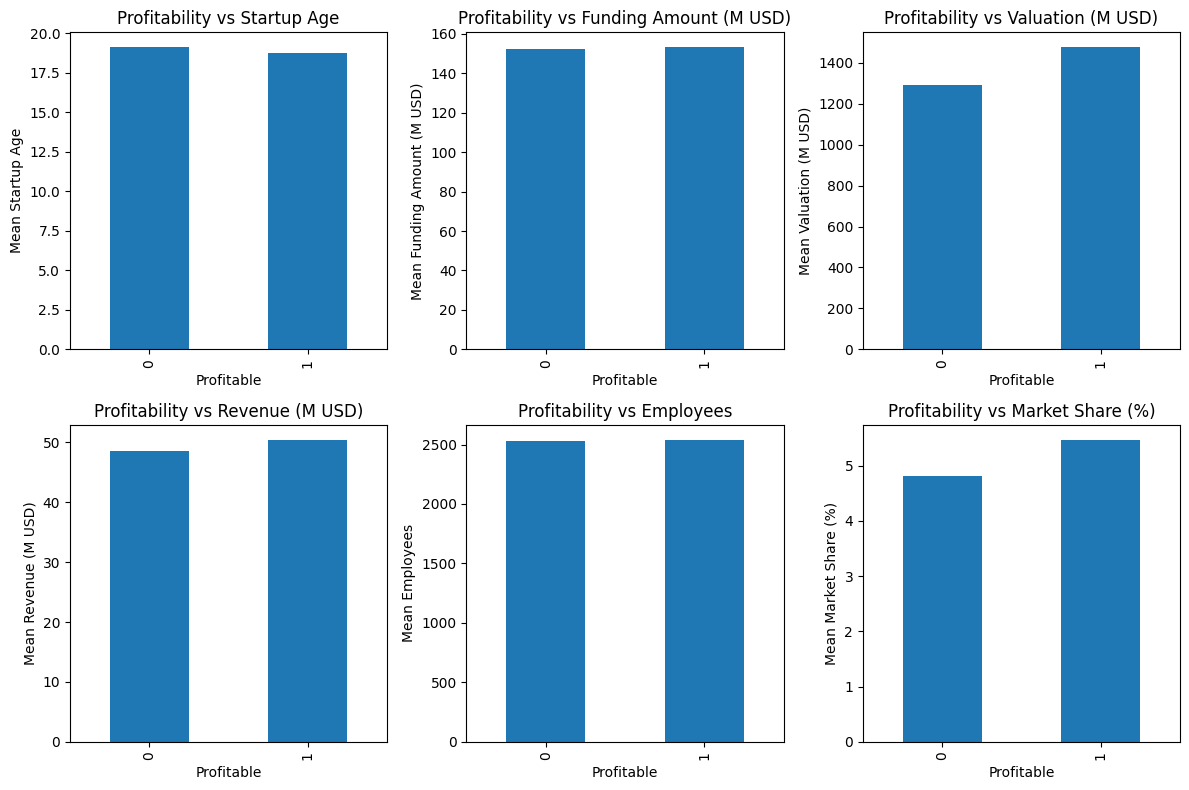

In [16]:
# Define figure size and layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through numerical features and plot mean values for each
for i, feature in enumerate(numerical_features):

    # Group the dataset by Profitable column and compute the mean of the selected feature within each profitability group
    df.groupby('Profitable')[feature].mean().plot(kind='bar', ax=axes[i])
    
    # Set the title for each plot
    axes[i].set_title(f'Profitability vs {feature}')

    # Set the y-axis label for each plot
    axes[i].set_ylabel(f'Mean {feature}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display plots
plt.show()

<br>

1. Profitable startups tend to have slightly higher revenue, making it an important factor for profitability

2. Market share appears higher for profitable startups, suggesting that capturing a larger portion of the market is beneficial

3. Profitable startups have slightly higher valuations, but the difference is not drastic, indicating that high valuation alone does not guarantee profitability

4. Funding Rounds are slightly higher for profitable startups, meaning some level of external funding can help, but excessive Funding Rounds may indicate financial instability

5. Startup Age does not show a strong difference, meaning older startups are not necessarily more profitable than younger ones

6. Number of Employees is similar across both profitable and unprofitable startups, meaning workforce size alone does not drive profitability

<br>

### Apply log transformation to Valuation (M USD)

This is done to mainly reduce the impact of right-skewed values in Valuation (M USD) and outliers (so that the outliers do not dominate the model)

In [17]:
# Apply log transformation to Valuation (M USD)
df["Log_Valuation"] = np.log1p(df["Valuation (M USD)"])

# Display the Log_Valuation column
print(df["Log_Valuation"])

0      6.740224
1      8.105256
2      6.966373
3      4.633758
4      6.746541
         ...   
495    7.774709
496    7.241065
497    6.220769
498    7.942902
499    7.849390
Name: Log_Valuation, Length: 500, dtype: float64


<br>

### Compare original vs. log-transformed Valuation

This is done to compare original valuation distribution and log-transformed valuation distribution. Below, two histograms are plotted

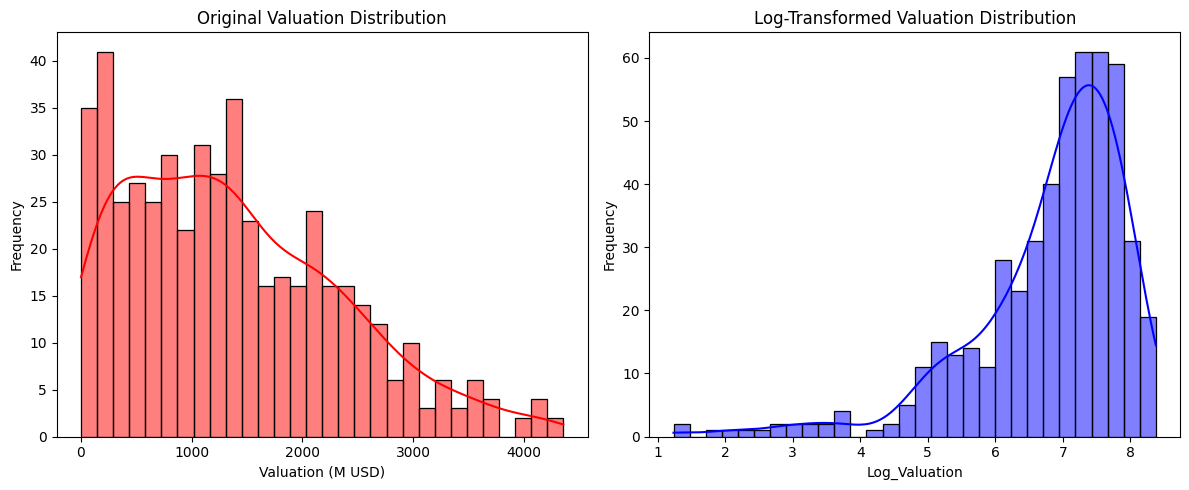

In [18]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

# Plot original Valuation histogram using seaborn
sns.histplot(df["Valuation (M USD)"], bins = 30, kde = True, color = "red", ax = axes[0])

# Set the title for the histogram
axes[0].set_title("Original Valuation Distribution")

# Set the x-axis label of the histogram
axes[0].set_xlabel("Valuation (M USD)")

# Set the y-axis label of the histogram
axes[0].set_ylabel("Frequency")

# Plot Log-Transformed Valuation histogram using seaborn
sns.histplot(df["Log_Valuation"], bins = 30, kde = True, color = "blue", ax = axes[1])

# Set the title for the histogram
axes[1].set_title("Log-Transformed Valuation Distribution")

# Set the x-axis label for the histogram
axes[1].set_xlabel("Log_Valuation")

# Set the y-axis label for the histogram
axes[1].set_ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout() 

# Diplsay plots
plt.show()

<br>

In the Original Valuation Distribution histogram (left plot), it can be observed that while most startups have low valuations, a small number have extremely high values (above 4000M USD). The long tail on the right indicates that outliers significantly influence the distribution.

<br>

In the Log-Transformed Valuation Distribution histogram (right plot), it can be observed that the values appear more bell-shaped, suggesting a closer alignment to a normal distribution after the log transformation. With the outliers compressed, the extreme values no longer have as much impact.

The log transformation effectively minimised the skewness, improving the feature's suitability for modelling. No additional transformations are required. 

<br>

<br>

### Convert categorical variables to integer

This is done to prepare the dataset for correlation analysis, machine learning models, and feature interpretability

<br>

In [19]:
# LabelEncoder for ordinal feature, Funding Rounds
le = LabelEncoder()
df["Funding Rounds"] = le.fit_transform(df["Funding Rounds"])

# One-hot encode for categorical columns
df = pd.get_dummies(df, columns=["Industry", "Region", "Exit Status"], drop_first=False)

# Select columns that are one-hot encoded
ohe_features = [col for col in df.columns if 'Industry_' in col or 'Region_' in col or 'Exit Status_' in col]

# Convert all one-hot encoded features to integer (0/1)
df[ohe_features] = df[ohe_features].astype(int)

<br>

### Feature Correlation Analysis

This is done to determine relationships between features in a dataset
- The goal is to identify redundancy, remove unnecessary features, and improve model performance

In [20]:
# Now that there is log-transformed valuation, drop valuation column to prevent redundancy
df.drop(columns = ["Valuation (M USD)"], inplace = True)

# Now that there is have Startup Age, drop Year Founded column to prevent redundancy
df.drop(columns = ["Year Founded"], inplace = True)

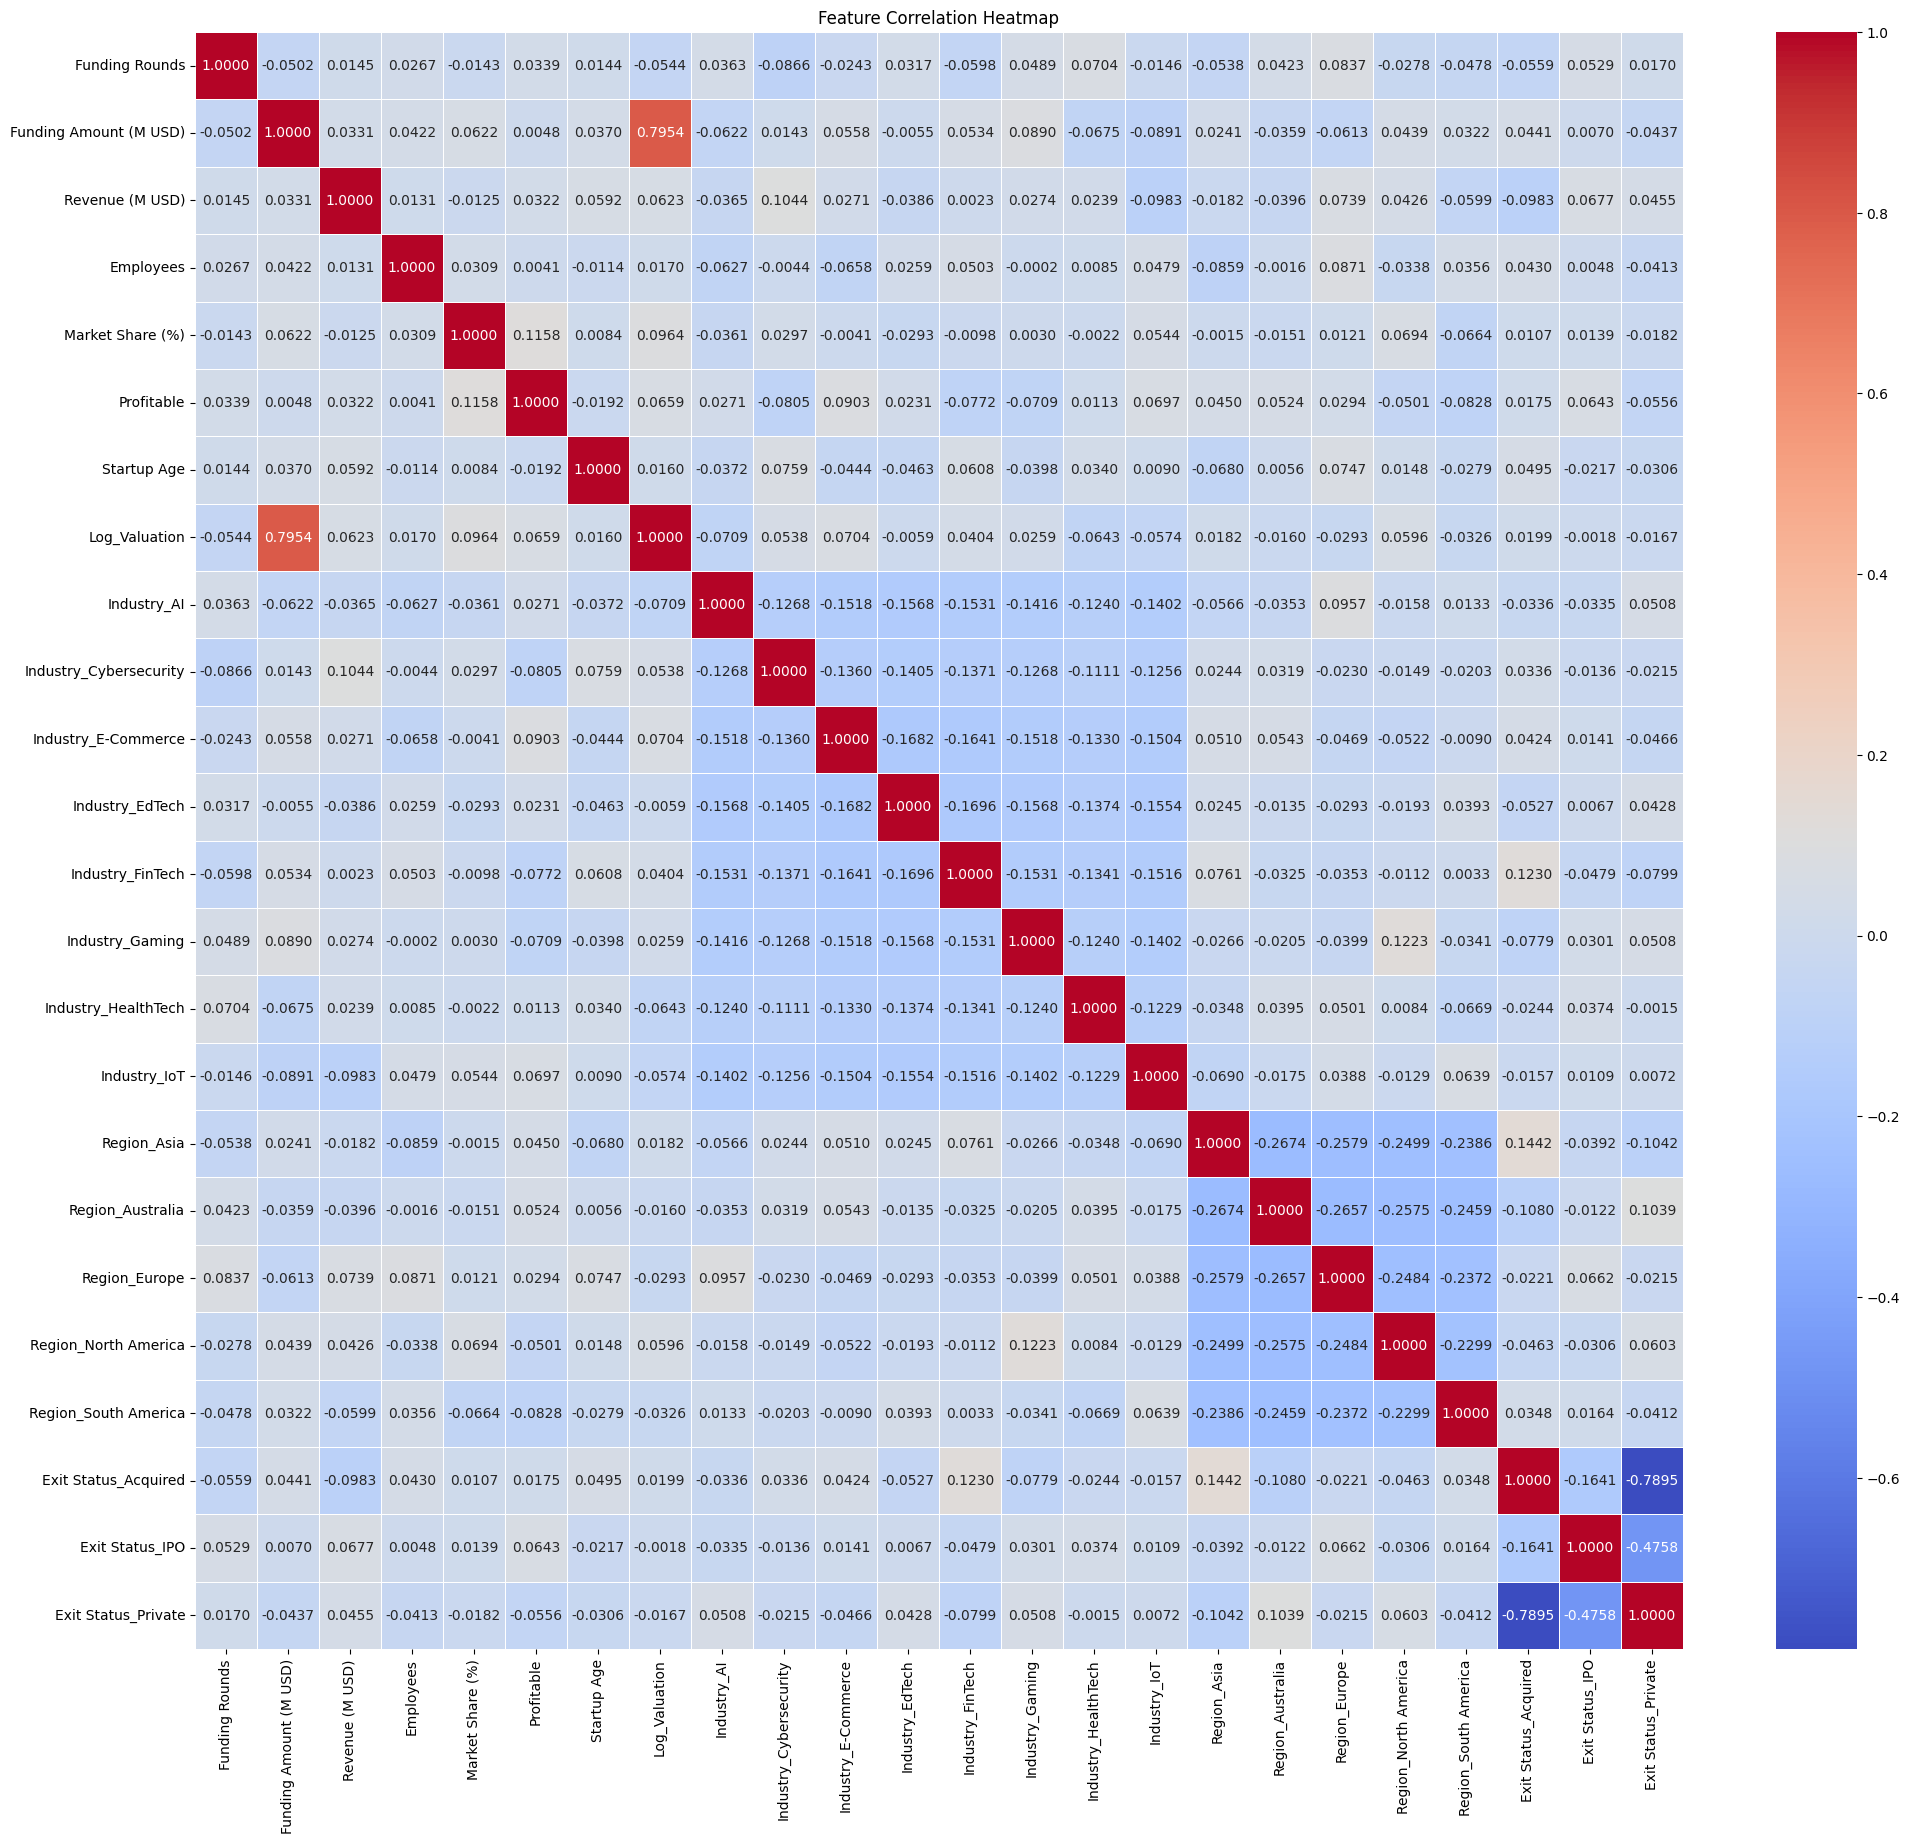

In [21]:
# Compute the Correlation Matrix
correlation_matrix = df.corr()

# Set the figure size
plt.figure(figsize = (24, 21)) #24, 21

# Plot heatmap using seaborn
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".4f", linewidths = 0.5)

# Set the title for the heatmap
plt.title("Feature Correlation Heatmap")

# Display the heatmap
plt.show()

<br>

Drop a feature that appears to be strongly correlated with other features, as it may not contribute any additional valuable information

Funding Amount (M USD) and Log_Valuation have a high correlation (0.7954), one of them should be removed to avoid multicollinearity, which can cause instability in models

Since Funding Amount is already well-distributed and symmetrical, it may be more useful than Log_Valuation, which is a transformed feature that introduces a different scale

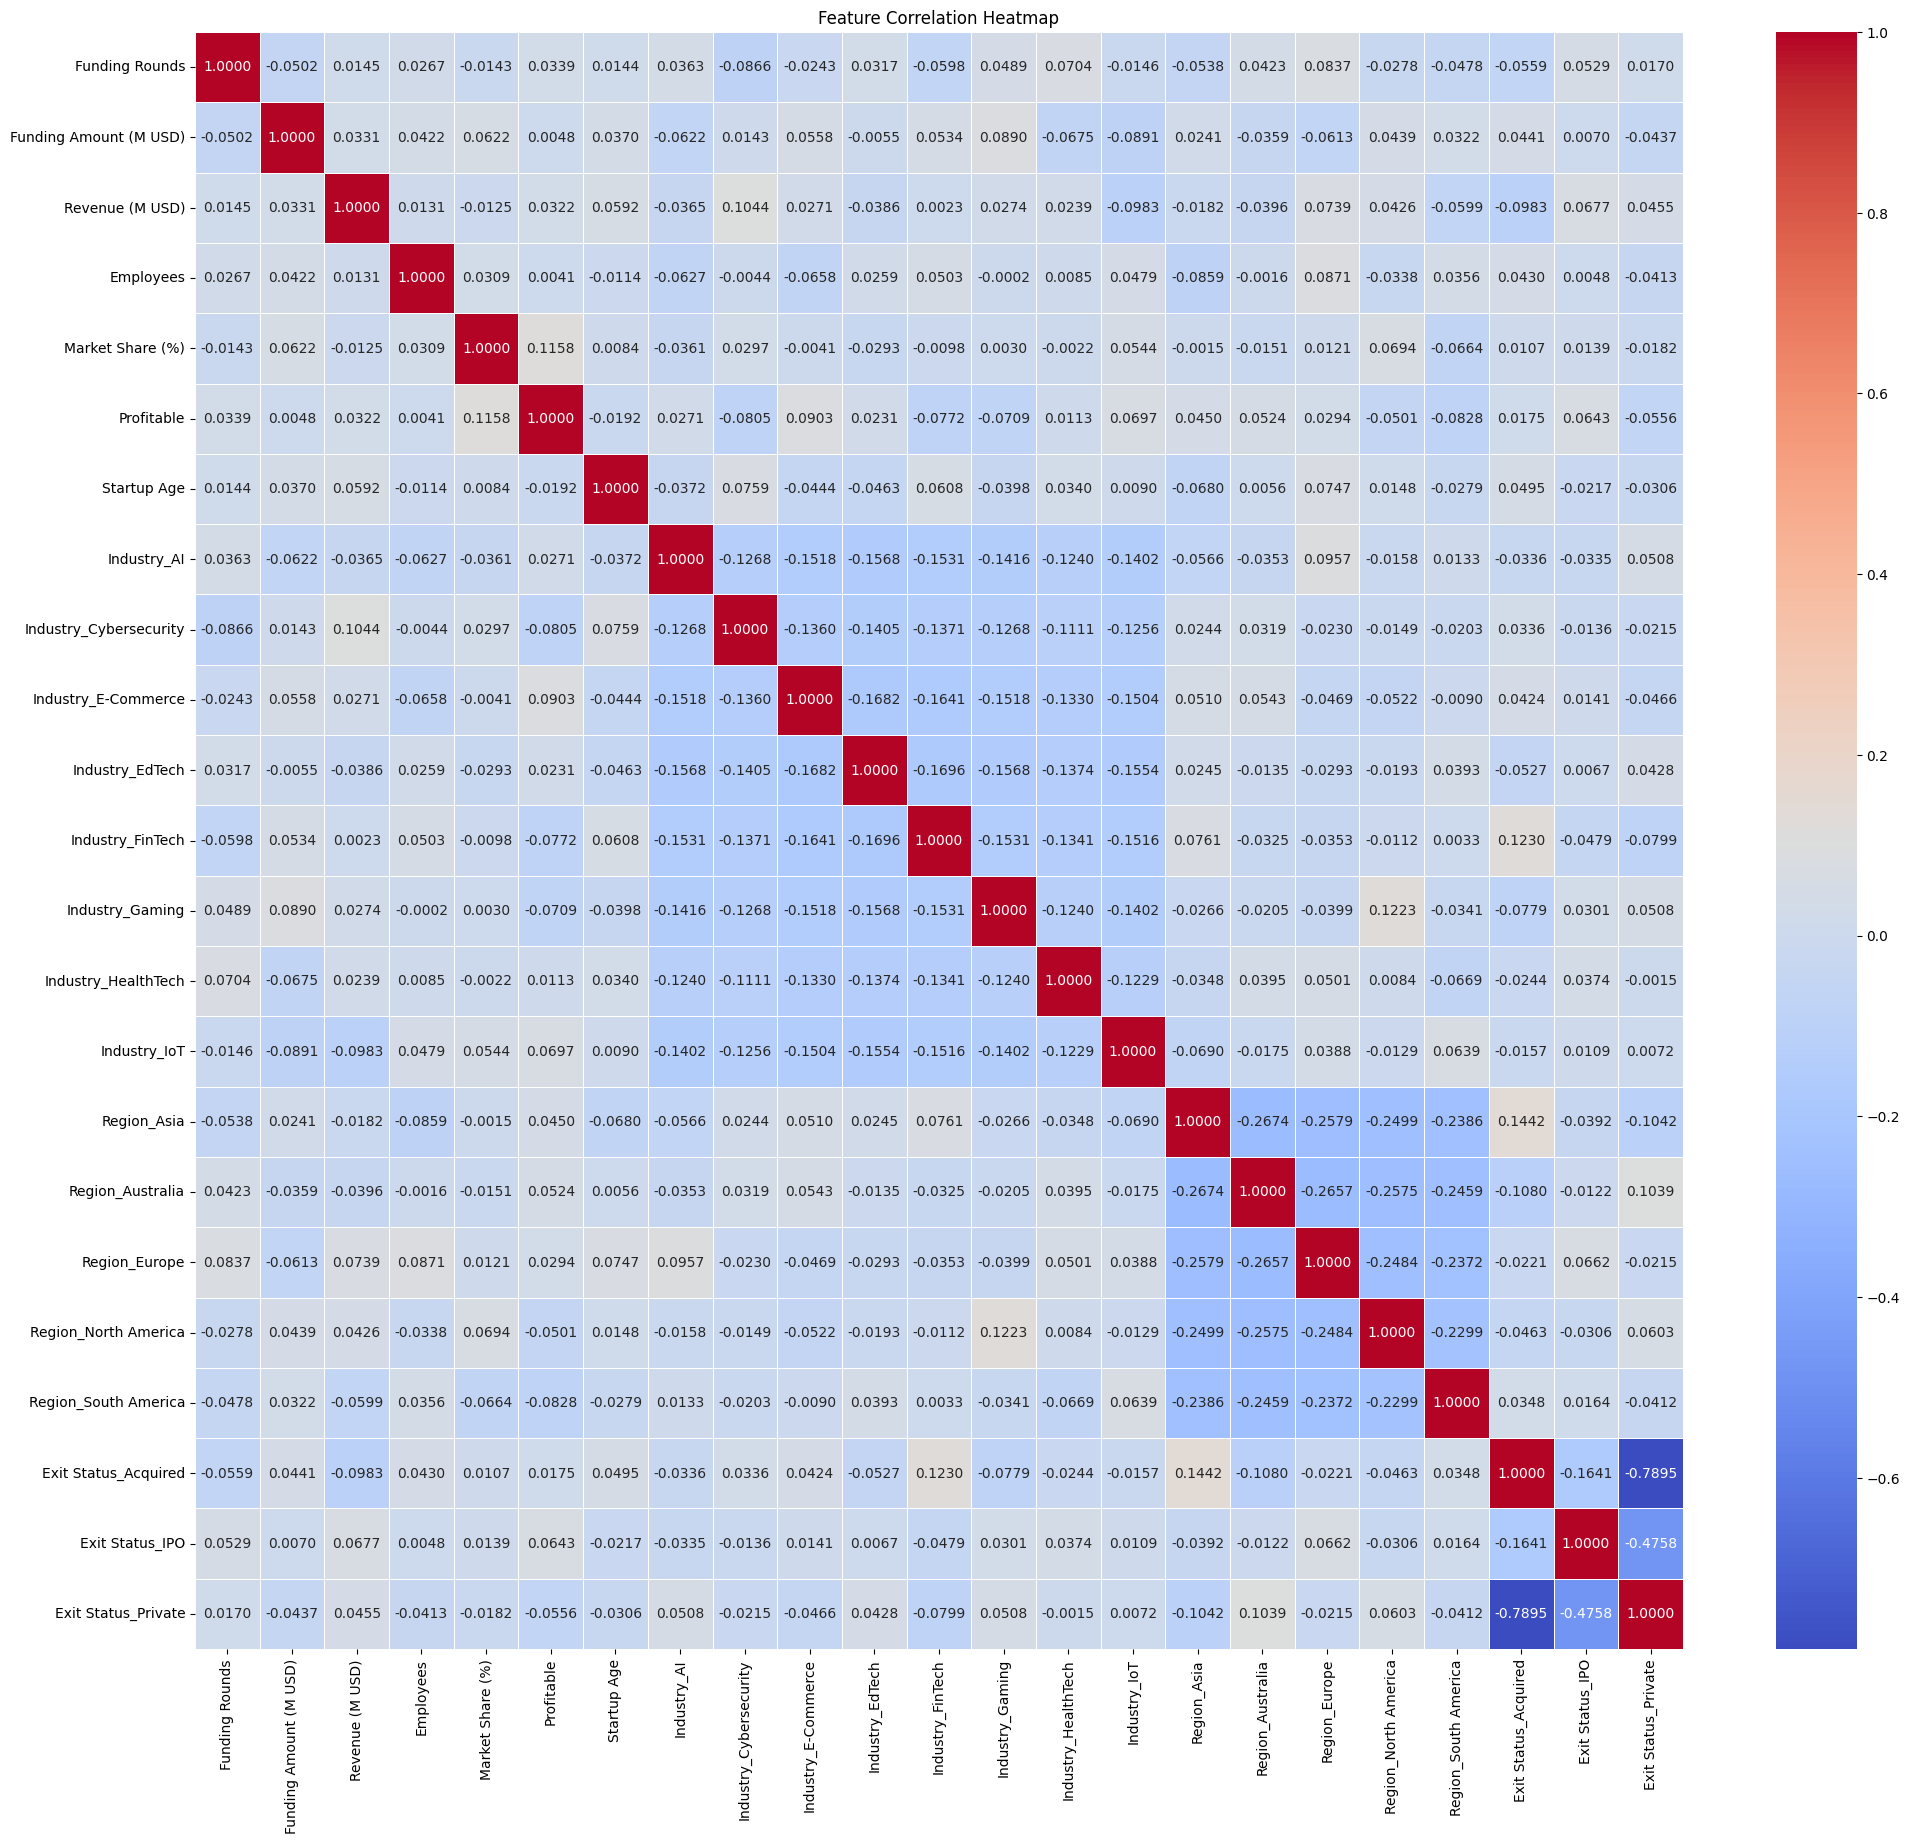

In [22]:
# Drop log_valuation
df.drop(columns=["Log_Valuation"], inplace=True)

# Compute the Correlation Matrix
correlation_matrix = df.corr()

# Set the figure size
plt.figure(figsize = (24, 21))

# Plot heatmap using seaborn
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".4f", linewidths = 0.5)

# Set the title for the heatmap
plt.title("Feature Correlation Heatmap")

# Display the heatmap
plt.show()

In [23]:
# Compute correlation with Profitable
correlation_table = df.corr()["Profitable"].sort_values(ascending=False)

# Convert to DataFrame for better visualisation
correlation_df = correlation_table.reset_index()
correlation_df.columns = ["Feature", "Correlation with Profitable"]

# Display neatly
display(correlation_df)


,Feature,Correlation with Profitable
0,Profitable,1.000000
1,Market Share (%),0.115842
2,Industry_E-Commerce,0.090295
3,Industry_IoT,0.069676
4,Exit Status_IPO,0.064333
5,Region_Australia,0.052432
6,Region_Asia,0.044964
7,Funding Rounds,0.033859
8,Revenue (M USD),0.032159
9,Region_Europe,0.029417


Top positive correlations with profitability

- Market Share (%) (0.1158)

    - The strongest positive indicator – Higher market share increases profitability

- Industry_E-Commerce (0.0903)

    - E-Commerce startups tend to be more profitable than other industries

- Industry_IoT (0.0697)

    - IoT startups show a mild tendency towards profitability

- Exit Status_IPO (0.0643)

    - Startups that went public (IPO) are more likely to be profitable

- Region_Australia (0.0524)

    - Startups based in Australia show a weak positive correlation with profitability

<br>

Top negative correlations with profitability

- Region_South America (-0.0828) 

    - Startups in South America are less likely to be profitable

- Industry_Cybersecurity (-0.0805)

    - Cybersecurity startups show a negative correlation

- Industry_FinTech (-0.0772)

    - FinTech startups tend to be unprofitable

- Industry_Gaming (-0.0709)

    - Gaming startups struggle with profitability

- Exit Status_Private (-0.0556)

    - Private startups tend to be less profitable

<br>

The correlation analysis only measured linear relationships with Profitable, so additional methods (F-Test, Mutual Information, Extra Trees) were used to capture non-linear relationships and provide a more comprehensive evaluation of feature relevance

<br>

- F_Test identifies statistically significant features for classification

    - Useful as it confirms if a feature is important even if correlation is weak 

        - capture linear relationship

- Mutual Information detects non-linear relationship that correlation misses

    - Useful as it finds interactions between features that might not be obvious

        - detect dependencies

- Extra Trees captures feature importance in tree-based models

    - Useful for non-linear models like Decision Trees and Random Forest

<br>

Since the dataset primarily consists of continuous numerical features, the Chi-squared test is not suitable for this analysis

<br>

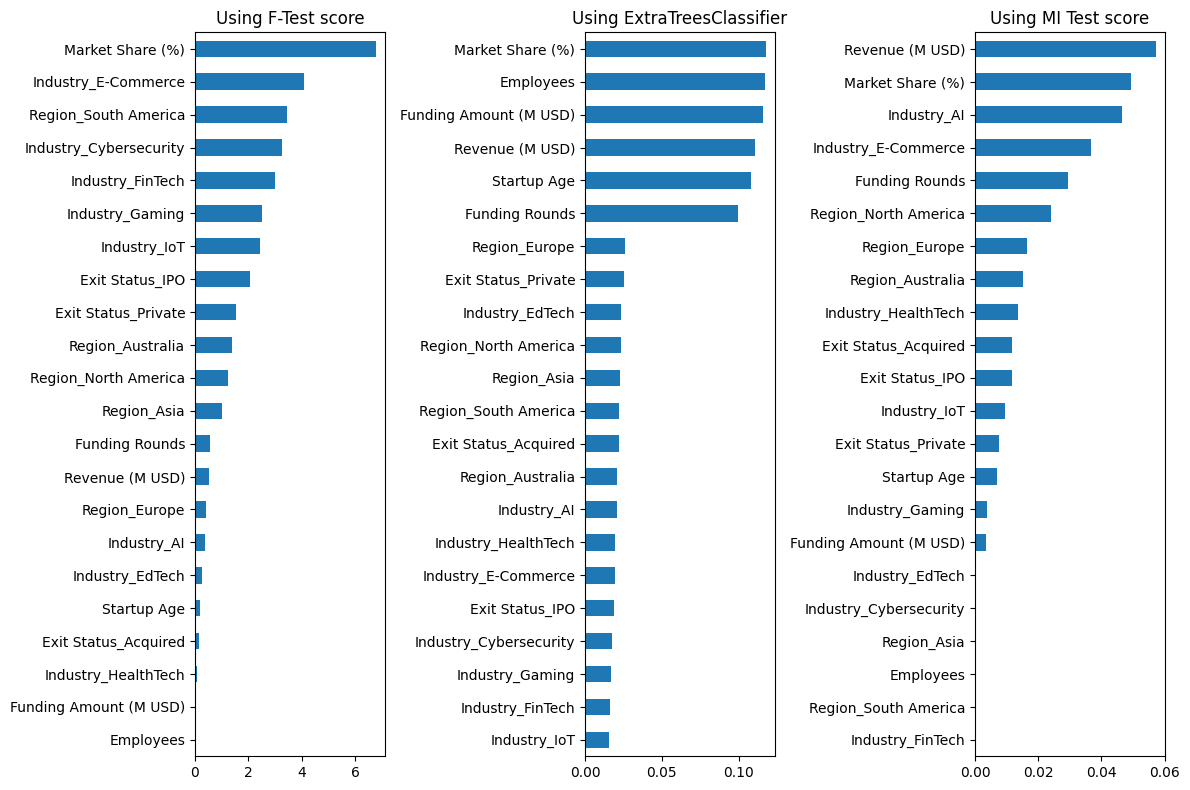

In [24]:
# Define feature
X = df.drop(columns=["Profitable"])

# Define target variable
y = df["Profitable"]

# Apply SelectKBest with f_classif (F-Test)
ftest = SelectKBest(score_func = f_classif, k = 'all').fit(X,y)

# Convert F-test score into a Pandas Series and sort values in ascending order
ftest_sorted = pd.Series(data=ftest.scores_, index=X.columns).sort_values()

# Apply SelectKBest with mutual_info_classif
mitest = SelectKBest(score_func = mutual_info_classif, k = 'all').fit(X,y)

# Convert mutual information scores into a Pandas Series and sort values in ascending order
mitest_sorted = pd.Series(data=mitest.scores_, index=X.columns).sort_values()

# Train an Extra Trees Classifier to compute feature importance
xtrees = ExtraTreesClassifier().fit(X, y)

# Convert features importance scores into a Pandas Series and sort values in ascending order
xtrees_sorted = pd.Series(data=xtrees.feature_importances_, index=X.columns).sort_values()

# Create a figure with 1 row and 3 columns of subplots for side-by-side comparisons
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.6)

# Plot F-test feature scores as a horizontal bar plot
ftest_sorted.plot(kind='barh', ax=axes[0], title='Using F-Test score')

# Plot ExtraTreesClassifier feature importances as a horizontal bar plot
xtrees_sorted.plot(kind='barh', ax=axes[1], title='Using ExtraTreesClassifier')

# Plot Mutual Information scores as a horizontal bar plot
mitest_sorted.plot(kind='barh', ax=axes[2], title='Using MI Test score')

# Adjust layout for better visualisation
plt.tight_layout()

# Display the plots
plt.show()


<br>

Features that will be kept were chosen by:

1. Correlation analysis

2. Statistically significant (F-Test)

3. Important in Decision Trees (Extra Trees)

4. Informative for predicting Profitable (Mutual Information Test)

<br>

**Features to keep**:

These features have shown strong importance in at least one of the feature selection methods and should be retained for model training

<br>

| **Feature** | **Reason** |
|------------|--------------------|
| **Market Share (%)** | Strongest correlation with Profitable and consistently ranked high in F-Test, MI Score, and Tree-Based Importance, that is, it has a strong linear and non-linear relationship with profitability |
| **Revenue (M USD)** | Ranked well in MI Score and ExtraTreesClassifier despite weak correlation with Profitable, that is, revenue is a significant predictor of profitability |
| **Funding Amount (M USD)** | Top-ranked feature in ExtraTreesClassifier, that is, it contributes significantly to model-based decision trees |
| **Funding Rounds** | Selected by ExtraTreesClassifier and F-Test, that is, it provides predictive value |
| **Employees** | Ranked third in ExtraTreesClassifier, that is, it is an important predictor in tree-based models |
| **Startup Age** | Ranked high in ExtraTreesClassifier, indicating it influences profitability |

<br>

**Features to drop**:

These features had low importance across all selection methods and do not contribute significantly to predicting Profitable

<br>

| **Feature** | **Reason** |
|------------|--------------------|
| **Industry** | Except a few, low or negative correlation with profitability, that is, they do not contribute significantly in a linear fashion, low feature importance scores in both ExtraTreesClassifier and Mutual Information, suggesting they do not provide substantial predictive value, may add noise rather than meaningful predictive power, leading to overfitting, ont-hot encoding increases feature dimensions unnecessarily, potentially reducing model performance |
| **Region** | Except a few, low or negative correlation with profitability, that is, they do not contribute significantly in a linear fashion, low feature importance scores in both ExtraTreesClassifier and Mutual Information, suggesting they do not provide substantial predictive value, may add noise rather than meaningful predictive power, leading to overfitting, ont-hot encoding increases feature dimensions unnecessarily, potentially reducing model performance |
| **Exit Status** | Their importance scores are inconsistent, Exit Status might be a result of profitability rather than a predictor, keeping these can lead to data leakage, as IPOs/acquisitions usually occur after profitability is established |


<br>

**Removing these features simplifies the model without losing predictive power**

<br>

In [25]:
# Drop all categorical features related to Industry, Region, Exit Status
df.drop(columns = [col for col in df.columns if col.startswith("Industry_")] + 
        [col for col in df.columns if col.startswith("Region_")] + 
        [col for col in df.columns if col.startswith("Exit Status_")]
        , inplace = True)

# Display the remaining columns after dropping Industry_, Region_, Exit_Status_ columns
df.columns

Index(['Funding Rounds', 'Funding Amount (M USD)', 'Revenue (M USD)',
       'Employees', 'Market Share (%)', 'Profitable', 'Startup Age'],
      dtype='object')

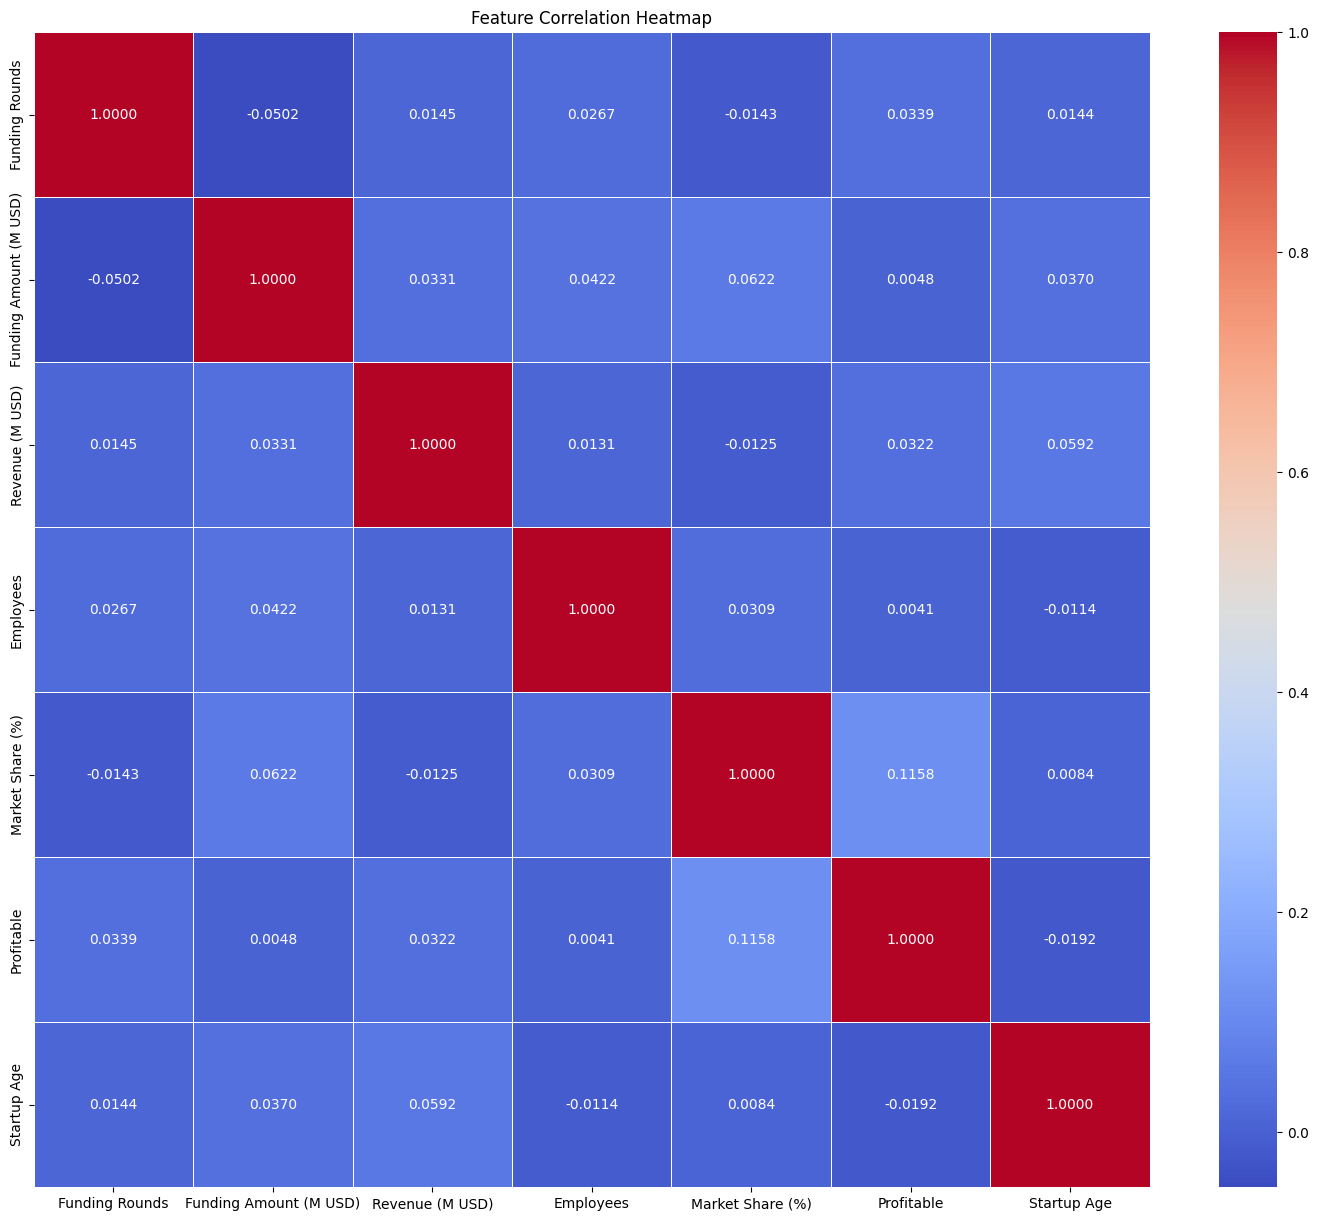

In [26]:
# Compute the Correlation Matrix
correlation_matrix = df.corr()

# Set figure size
plt.figure(figsize = (18, 15))

# Plot heatmap with correlation values
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".4f", linewidths = 0.5)

# Set a title
plt.title("Feature Correlation Heatmap")

# Display the heatmap
plt.show()

In [27]:
# Compute correlation with Profitable
correlation_table = df.corr()["Profitable"].sort_values(ascending=False)

# Convert to DataFrame for better visualisation
correlation_df = correlation_table.reset_index()
correlation_df.columns = ["Feature", "Correlation with Profitable"]

# Display neatly
display(correlation_df)

,Feature,Correlation with Profitable
0,Profitable,1.000000
1,Market Share (%),0.115842
2,Funding Rounds,0.033859
3,Revenue (M USD),0.032159
4,Funding Amount (M USD),0.004792
5,Employees,0.004114
6,Startup Age,-0.019239


<br>

---

<br>

# Methodologies

## Model Training & Evaluation

### Define Features and Target

Since feature selection and preprocessing are completed, now separate features (X) and the target variable (y)

- This is done to ensure only relevant features are used for training

- The target variable remains binary (0 = Not Profitable, 1 = Profitable) for classification

<br>

In [28]:
# Define target variable (Profitable: 0 or 1)
y = df["Profitable"]

# Define features
X = df.drop(columns=["Profitable"])

# Print feature set structure
print("Feature set shape: ", X.shape)

# Print target set structure
print("Target variable shape: ", y.shape)

Feature set shape:  (500, 6)
Target variable shape:  (500,)


<br>

### Train-Test split

This is done to prepare for model training

In [29]:
# Split data into 80% training and 20% testing
# random_state to ensure that the same training and testing sets are generated every time the code runs
# stratify sampling to ensure class balance in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Initialise the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test set
X_test_scaled = scaler.transform(X_test)

# Print the shape (dimensions) of the training set
print("Training set shape: ", X_train.shape, y_train.shape)

# Print the shape (dimensions) of the test set
print("Testing set shape: ", X_test.shape, y_test.shape)

Training set shape:  (400, 6) (400,)
Testing set shape:  (100, 6) (100,)


<br>

### Train Machine Learning Models

Train models

In [30]:
# Initialise the Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Initialise the Random Forest Model
random_forest = RandomForestClassifier(n_estimators = 3, max_depth=3, min_samples_split=88, min_samples_leaf=58, random_state = 42)

# Train the Logistic Regression model
logistic_regression.fit(X_train, y_train)

# Train the Random Forest model
random_forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, min_samples_leaf=58, min_samples_split=88,
                       n_estimators=3, random_state=42)

<br>

### Model Evaluation

This is done by making predictions on test data and evaluate model performance

<br>

1. Make predictions on test set

2. Compute Performance Metrics and evaluate:

    - Accuracy: overall correctness of predictions

    - Precision: the number of predicted positives that were actually correct

    - Recall: the number of actual positives that were correctly identified

    - ROC AUC Score: measures the model's ability to distinguish between classes


In [31]:
# Initialise the Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Initialise the Random Forest Model
random_forest = RandomForestClassifier(n_estimators = 3, max_depth=3, min_samples_split=88, min_samples_leaf=58, random_state = 42)

# Train the Logistic Regression model
logistic_regression.fit(X_train, y_train)

# Train the Random Forest model
random_forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, min_samples_leaf=58, min_samples_split=88,
                       n_estimators=3, random_state=42)


Logistic Regression Performance:
Training Accuracy: 0.5925
Test Accuracy: 0.5400
Training AUC Score: 0.5927
Test AUC Score: 0.5051
              precision    recall  f1-score   support

           0       0.57      0.75      0.65        57
           1       0.44      0.26      0.32        43

    accuracy                           0.54       100
   macro avg       0.51      0.51      0.49       100
weighted avg       0.52      0.54      0.51       100

⚠️ Logistic Regression may be UNDERFITTING, reason: (Low Training & Test AUC)

Logistic Regression Cross-Validation Scores for Accuracy: [0.6    0.5625 0.6125 0.55   0.475 ]
Mean CV Accuracy: 0.5600 with STD 0.0483

Logistic Regression Cross-Validation Scores for AUC: [0.57650794 0.57460317 0.56634921 0.58887468 0.43861893]
Mean CV AUC: 0.5490 with STD 0.0557


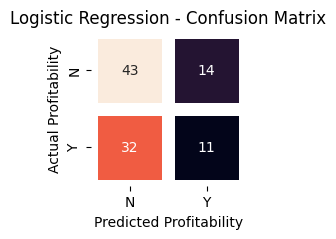


Random Forest Performance:
Training Accuracy: 0.5775
Test Accuracy: 0.5700
Training AUC Score: 0.6183
Test AUC Score: 0.5333
              precision    recall  f1-score   support

           0       0.62      0.65      0.63        57
           1       0.50      0.47      0.48        43

    accuracy                           0.57       100
   macro avg       0.56      0.56      0.56       100
weighted avg       0.57      0.57      0.57       100


Random Forest Cross-Validation Scores for Accuracy: [0.55   0.475  0.625  0.575  0.4875]
Mean CV Accuracy: 0.5425 with STD 0.0557

Random Forest Cross-Validation Scores for AUC: [0.53174603 0.54571429 0.6168254  0.63586957 0.46451407]
Mean CV AUC: 0.5589 with STD 0.0618


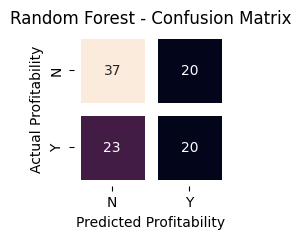

In [32]:
# Define the function to evaluate a machine learning model
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, y_pred=None):

    # Make predictions on test set on the test set if predictions are not provided
    if y_pred is None:

        # Generate predictions using the model's prediction method
        y_pred = model.predict(X_test)

    # Compute Accuracy for test set
    test_acc = accuracy_score(y_test, y_pred)

    # Compute Accuracy for training set
    train_acc = model.score(X_train, y_train)

    # Compute AUC scores (only if model supports probability predictions)
    ## Check if the model has the predict_proba method
    if hasattr(model, "predict_proba"):

        ## AUC on training data using predicted probabilities
        train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

        ## AUC on test data using predicted probabilities
        test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    else:
        ## If the model does not support predictions, AUC is not calculated
        train_auc, test_auc = None, None

    # Print evaluation results for the model
    ## Print the model name as a header
    print(f"\n{model_name} Performance:")

    ## Print the training accuracy rounded to 4 decimal places
    print(f"Training Accuracy: {train_acc:.4f}")

    ## Print the test accuracy rounded to 4 decimal places
    print(f"Test Accuracy: {test_acc:.4f}")

    # Print AUC scores if available
    ## Only print AUC scores if they were computed
    if train_auc and test_auc:

        # Print the training AUC score rounded to 4 decimal places
        print(f"Training AUC Score: {train_auc:.4f}")

        # Print the test AUC score rounded to 4 decimal places
        print(f"Test AUC Score: {test_auc:.4f}")

    # Print classification report (Precision, Recall, F1-score) for the test set
    ## Provide detailed performance metrics for each class
    print(classification_report(y_test, y_pred, zero_division=1))

    # Check Overfitting / Underfitting Conditions
    ## 10% threshold for overfitting
    overfit_threshold = 0.1

    # 10% threshold for AUC gap
    auc_gap_threshold = 0.1

    # If both training accuracy and test accuracy are under 60%, consider underfitting
    underfit_threshold = 0.60

    # Check for overfitting
    ## Check if the difference between training and test accuracy exceeds the overfitting threshold
    if (train_acc - test_acc) > overfit_threshold:
        print(f"⚠️ {model_name} may be OVERFITTING – model is too complex, reason: (Training Accuracy > Test Accuracy)")

    ## Check if the difference between training and test AUC exceeds the overfitting threshold
    if (train_auc - test_auc) > auc_gap_threshold:
        print(f"⚠️ {model_name} may be OVERFITTING - model is too complex, reason: (Training AUC > Test AUC)")

    # Check for underfitting
    ## Check if the model is underfitting based on AUC
    if train_auc and test_auc and (train_auc < 0.60 and test_auc < 0.60):
        print(f"⚠️ {model_name} may be UNDERFITTING, reason: (Low Training & Test AUC)")

    
    # Perform Cross-Validation
    cv_scores_acc = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores_auc = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')


    # Print the model's cross-validation score
    print(f"\n{model_name} Cross-Validation Scores for Accuracy: {cv_scores_acc}")

    # Print the model's mean cross-validation accuracy
    print(f"Mean CV Accuracy: {np.mean(cv_scores_acc):.4f} with STD {np.std(cv_scores_acc):.4f}")

    # Print the model's cross-validation score
    print(f"\n{model_name} Cross-Validation Scores for AUC: {cv_scores_auc}")

    # Print the model's mean cross-validation AUC
    print(f"Mean CV AUC: {np.mean(cv_scores_auc):.4f} with STD {np.std(cv_scores_auc):.4f}")


    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Set a figure size
    plt.figure(figsize=(2, 2))

    # Create a confusion matrix
    confusion_mat = sns.heatmap(cm, annot=True, xticklabels=['N', 'Y'], cbar=False, yticklabels=['N', 'Y'], square=True, linewidths=8.0)
    
    # Set a x-axis label
    confusion_mat.set_xlabel('Predicted Profitability')

    # Set a y-axis label
    confusion_mat.set_ylabel('Actual Profitability')

    # Set a title
    plt.title(f'{model_name} - Confusion Matrix')

    # Display confusion matrix
    plt.show()

# Evaluate Logistic Regression model
evaluate_model(logistic_regression, X_train, y_train, X_test, y_test, "Logistic Regression")

# Evaluate Random Forest model
evaluate_model(random_forest, X_train, y_train, X_test, y_test, "Random Forest")

<br>

Key Findings and Metrics

<br>

1. AUC Score (ROC-AUC)

- AUC Score (ROC-AUC) is the best for measuring how well the model ranks positive vs. negative cases

    - Since profitability prediction is a classification problem, AUC tells how well the model distinguishes profitable from unprofitable startups; higher AUC means better differentiation

        - Random Forest has higher AUC (0.5333), but it is still low

        - AUC below 0.6 suggests that while the model captures some patterns, its predictive power is limited

<br>

2. F1-Score

- F1-Score is the best for evaluating model performance when classes are imbalanced

    - If the dataset has fewer profitable startups, accuracy alone can be misleading

    - F1-Score balances precision and recall, helping assess how well the model handles both false positives and false negatives

        - Random Forest has a better F1-Score (48%) for profitable startups than Logistic Regression (32%), which indicates a more balanced trade-off between precision and recall

<br>

3. Cross-Validation Score - Checks how stable the model is

    - Cross-Validation Score is the best for measuring how stable and generalisable a model is

        - If a model has high AUC but low cross-validation accuracy, it may be overfitting

        - This score ensures the model works well on different subsets of data

            - Logistic Regression has a slightly better mean cross-validation accuracy (56%) than Random (54.25%)

                - It generalises slightly better across different data splits

            - Random Forest has higher standard deviation (STD ±5.57%) in cross-validation accuracy

                - Its AUC score fluctuates more depending on the dataset split

                    - Less stable, more sensitive to variations in the dataset compared to Logistic Regression
            
            - Random Forest has a slightly better mean cross-validation AUC (55.89%) than Logistic Regression (54.9%)

                - It differentiates between classes slightly better
            
            - Random Forest has higher standard deviation (STD ±6.18%) in cross-validation AUC 

                - Its AUC score fluctuates more depending on the dataset split  

                    - Less stable, more sensitive to variations in the dataset compared to Logistic Regression

<br>

4. Accuracy, Precision and Recall for deeper analysis

- Accuracy, Precision and Recall are the best for understanding errors in classification

    - High Accuracy: overall correct classifications improve

    - High Precision: fewer startups incorrectly predicted as profitable

    - High Recall: more actual profitable startups correctly identified

<br>

- If missing profitable startups is costly (false negatives matter most), prioritise recall

- If misclassifying unprofitable startups is costly (false positives matter most), prioritise precision

- Random Forest is a better all-around model, while Logistic Regression is more conservative in predicting profitability

<br>

Interpreting the Confusion Matrices

<br>

1. Logistic Regression

    - False Negatives (32): fails to identify many startups that actually became profitable

    - False Positives (14): incorrectly predicts some startups as profitable when they are not

    - True Negatives (43): good at detecting unprofitable startups

    - True Positives (11): misses many profitable startups

    - Strong at identifying failing startups (75% recall), weak at predicting successful ones (26% recall)

<br>

2. Random Forest

    - False Negatives (23): better at capturing profitable startups than Logistic Regression (47% recall vs. 26%)

    - False Positives (20): more aggressive in predicting profitability, but at the cost of more mistakes

    - True Negatives (37): good at identifying failing startups

    - True Positives (20): captures more profitable startups

    - More balanced than Logistic Regression, but still weak in overall predictive performance

<br>

Overall model comparison for profitable & unprofitable startups

| **Better Model For** | **Selected Model** | **Justification** |
|--------------------|------------------|------------------|
| **Overall Performance** | Random Forest | Higher test accuracy (57%), better AUC (0.5333 vs. 0.5051 for Logistic Regression) and better recall for profitable startups, moderate stability (STD ±5.57%) |
| **Identifying Profitable Startups** | Random Forest | Better recall (47%) for profitable startups compared to Logistic Regression (26%) – correctly identifies more startups that actually become profitable |
| **Identifying Unprofitable Startups** | Logistic Regression | Higher recall for unprofitable startups (75%) compared to 65% in Random Forest – it is more cautious and better at detecting failing startups |
| **Baseline Model** | Logistic Regression | Performs worse than Random Forest in most cases, but is more interpretable, test accuracy is only 59.27%, AUC is low (0.5051), recall for profitable startups is very low (26%) – it struggles to predict successful startups |

<br>


<br>

---

## Feature Selection Insights: Logistic Regression and Random Forest

This is done to understand the relationships between features and the target variable, guiding feature selection and improving model interpretability

- Different models capture different relationships

    - Logistic Regression is a linear model that assumes each feature has an independent, additive effect on the target

    - Random Forest is a non-linear, tree-based model that captures interactions between features

- By comparing them, can identify which features contribute consistently across models and which may be model-specific

    - Logistic Regression provides coefficients, making it easy to understand how each feature impacts predictions

    - Random Forest provides feature importance scores, which are useful but do not explain the exact nature of the relationship

- Comparing them balances interpretability and predictive power, making the model more explainable for stakeholders

<br>

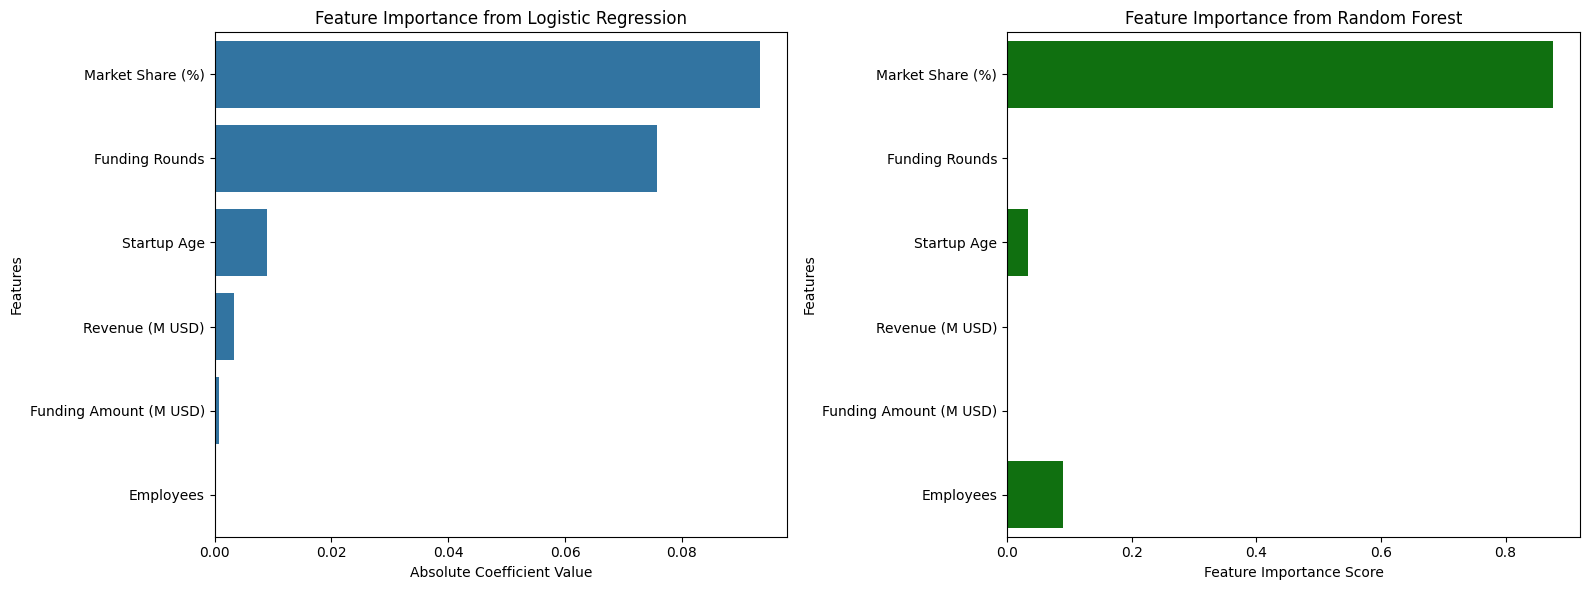

In [33]:
# Get feature coefficients from Logistic Regression
lr_coefficients = logistic_regression.coef_.flatten()

# Create a DataFrame for Logistic Regression feature importance
lr_feature_importance_df = pd.DataFrame({
    
    # Assign the names of the features from the training dataset
    "Feature": X_train.columns,
    
    # Assign the Absolute Coefficient Values computed by trained Logistic Regression model to the Logistic Regression Importance column in the new DataFrame
    "Logistic Regression Importance": np.abs(lr_coefficients)

})

# Create a DataFrame for Random Forest feature importance
rf_feature_importance_df = pd.DataFrame({

    # Assign the names of the features from the training dataset
    "Feature": X_train.columns,

    # Assign the feature importance values computed by the trained Random Forest model to the Random Forest Importance column in the new DataFrame
    "Random Forest Importance": random_forest.feature_importances_

})

# Merge both DataFrames for comparison
comparison_df = lr_feature_importance_df.merge(rf_feature_importance_df, on="Feature", how="inner")

# Sort by Logistic Regression importance for alignment
comparison_df = comparison_df.sort_values(by="Logistic Regression Importance", ascending=False)

# Plot comparison of Logistic Regression and Random Forest feature importance
## Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot Logistic Regression Feature Importance (Left) using seaborn
sns.barplot(x="Logistic Regression Importance", y="Feature", data=comparison_df, ax=axes[0])

# Set x-axis label
axes[0].set_xlabel("Absolute Coefficient Value")

# Set y-axis label
axes[0].set_ylabel("Features")

# Set a title
axes[0].set_title("Feature Importance from Logistic Regression")

# Plot Random Forest Feature Importance (Right)
sns.barplot(x="Random Forest Importance", y="Feature", color = "Green", data=comparison_df, ax=axes[1])

# Set x-axis label
axes[1].set_xlabel("Feature Importance Score")

# Set y-axis label
axes[1].set_ylabel("Features")

# Set a title
axes[1].set_title("Feature Importance from Random Forest")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display plots
plt.show()



<br>

Analysis of Feature Importance: Logistic Regression vs. Random Forest

- Observations from Logistic Regression (Left)

    1. Market Share (%) and Funding Rounds are the most important features (largest absolute coefficient values)

    2. Startup Age, Revenue (M USD), Funding Amount (M USD), and Employees contribute very little to the model

    3. Since Logistic Regression is a linear model, it assigns importance based on how much a one-unit change in a feature affects profitability

- Interpretation

    - Market Share (%) has the strongest impact, meaning an increase in market share significantly affects profitability in a linear way

    - Funding Rounds also plays significant role, possibly indicating that the more funding rounds a startup has, the more likely it is to be profitable

    - Startup Age is moderately important, meaning older startups tend to behave differently in profitability compared to newer ones

    - Revenue (M USD), Funding Amount (M USD), and Employees are almost negligible, suggesting they may not have a direct linear impact on profitability

<br>

- Observations from Random Forest (Right)

    1. Market Share (%) is the most important feature by a large margin

    2. Funding Rounds is included, but much less important than in Logistic Regression

    3. Employees has higher importance in Random Forest than in Logistic Regression

    4. Startup Age, Revenue (M USD), and Funding Amount (M USD) contribute minimally

- Interpretation

    - Market Share (%) is highly dominant, indicating that in a non-linear setting, it has strong predictive power

    - Funding Rounds is less important than in Logistic Regression, suggesting that while it is a linear predictor, it may not contribute as much when interactions between features are considered

    - Employees is more relevant in Random Forest than Logistic Regression, implying that the number of employees affects profitability in a complex, non-linear manner

    - Startup Age remains slightly relevant, but its importance is reduced compared to Logistic Regression

<br>

Conclusion: 

1. Market Share (%) is consistently the most important feature in both models

    - This suggests that a higher market share significantly increases the probability of profitability

2. Funding Rounds is a strong predictor in LR but much weaker in RF.

    - This implies that its impact is mostly linear and lacks strong interactions with other features

3. Employees is more important in RF than in LR

    - This suggests that the number of employees influences profitability in a non-linear way, meaning startups with a specific range of employees may perform better

4. Revenue and Funding Amount are weak predictors in both models

    - This indicates that these metrics alone do not strongly determine profitability

<br>

While Market Share (%) is the most influential feature in both models, its dominance suggests that the dataset may be biased towards a single predictor. Funding Rounds and Employees behave differently in Logistic Regression and Random Forest, indicating that more complex models or additional business metrics could improve predictions. To enhance the predictive power of the model, incorporating external financial and operational indicators, such as profit margins, burn rate, and customer retention, would allow for a more comprehensive assessment of startup profitability.

<br>

---

<br>

# Conclusion

## How accurately can machine learning models predict startup profitability based on funding, market share, and other business factors?

The machine learning models tested (Logistic Regression and Random Forest) showed moderate accuracy in predicting startup profitability, but their predictive power is limited due to feature constraints.

Between the two models, Random Forest performed better at identifying profitable startups while maintaining a balance with unprofitable ones. However, its predictive power remains weak (AUC = 0.5333), indicating that it does not reliably distinguish profitable from unprofitable startups.

<br>

These results suggest that neither Logistic Regression nor Random Forest is highly effective for predicting startup profitability. That is, machine learning alone is insufficient for accurately predicting startup success. Hence, further improvements are needed to provide practical benefits.

<br>

The limited predictive power of these models can be largely attributed to missing key business indicators. The dataset primarily captures surface-level financial data but lacks deeper insights necessary for evaluating startup profitability.

The current dataset contains basic financial and operational information about startups, but it lacks deeper financial, market, and operational efficiency indicators that are crucial for better profitability prediction. 

One major limitation of the dataset is the lack of historical data. Many key financial and growth metrics, such as revenue growth rate, employee growth rate, and years since last funding round, require past values to measure trends over time. However, the dataset only provides current revenue, employee count, and funding rounds, making it impossible to track changes or calculate growth. For instance, without last year's revenue, I could not determine how much a startup's revenue has increased or declined over time.

Another challenge is the lack of cost and expense data, which is critical for deeper financial analysis. The dataset includes revenue and funding amount, but it lacks information on operational costs, debt, and profit margins. Profitability is represented as a binary outcome (0 = not profitable, 1 = profitable), but without details like net income, burn rate, or Cost Of Goods Sold (COGS), I could not compute essential financial ratios such as net profit margin or gross profit margin. These ratios are crucial for understanding a startup's true financial health beyond just its revenue figures.

Finally, the dataset does not provide sufficient customer and market-related data, which limits the ability to assess a startup's competitive advantage and long-term sustainability. While Market Share (%) is available, it does not capture critical insights such as Customer Acquisition Cost (CAC), customer retention rate, or industry growth trends. A startup might have a high market share, but without knowing customer churn rates or marketing expenses, it is unclear whether it can maintain its position or if its growth is unsustainable

<br>

To improve the predictive power of the models in startup profitability prediction, adding key financial and operational metrics would not only improve interpretability but also allow machine learning models to capture more complex relationships that drive startup success. Since the current dataset lacks historical financial data, cost structures, and customer-related metrics, integrating these factors can help models better distinguish between truly profitable startups and those that merely have high funding or market share.



<br>

| **Category**               | **Key Metrics to Add**                                   | **Benefit**                                               |
|---------------------------|-----------------------------------------------------|-----------------------------------------------------------|
| **Financial Performance**  | Gross Profit Margin, Net Profit Margin, Burn Rate, Revenue Growth | Provides direct indicators of financial sustainability and profitability                       |
| **Market Position**        | Customer Retention Rate, Market Share, Competitive Moat | Measures a startup's ability to sustain long-term market success                |
| **Funding & Investors**    | Investor Type, Time Since Last Round | Assesses financial backing, investment stability, and potential growth constraints                         |
| **Operational Efficiency** | Cost of Goods Sold (COGS), Employee Growth Rate | Helps differentiate between efficient scaling and unsustainable expansion |

<br>

Once additional data is collected, leveraging external financial indicators, advanced feature selection techniques, and further hyperparameter tuning can significantly enhance predictive performance. These improvements will allow models to capture more complex patterns in startup profitability and offer more practical decision-making insights for investors, entrepreneurs, and market analysts.

<br>
